# P100 Final Project: Evaluating Sales KPI and Product Range Analysis

## Table of Contents

* [Project Description](#description)
* [Step 1: Task Decomposition](#step_1)
* [Step 2: Load The Data and Look at General Information](#step_2)
    * [Conclusion](#conclusion_2)
* [Step 3: Data Preprocessing](#step_3)
    * [Cleaning Rows with Missing Values](#step_3_1)
    * [Cleaning Duplicated Rows](#step_3_2)
    * [Cleaning The Negative Values in the `quantity` Column](#step_3_3)
    * [Cleaning the `stock_code` column](#step_3_4)
    * [Conclusion](#conclusion_3)
* [Step 4: Calculating Sales Key Performance Indicators](#step_4)
    * [Monthly Revenue ](#step_4_1)
    * [Percent Growth](#step_4_2)
    * [Average Check](#step_4_3)
    * [Average Revenue Per Paying User (ARPPU)](#step_4_4)
    * [Average Revenue Per Unit (ARPU)](#step_4_5)
    * [Product Performace](#step_4_6)
    * [Analysis](#step_4_6)
    * [Conclusion](#conclusion_4)
* [Step 5: Product Range Analysis](#step_5)
    * [Finding Items Commonly Sold In Bundles](#step_5_1)
    * [Finding Product Categories](#step_5_2)
    * [Finding Items Commonly Sold In Bundles](#step_5_3)
    * [Group the product categories and find the total count of invoice_no](#step_5_4)
    * [Conclusion](#conclusion_5)
* [Step 6: Hypothesis Testing](#step_6)
    * [Conclusion](#conclusion_6)
* [Step 7: Additional Research](#step_7)
    * [Conclusion](#conclusion_7)
* [Step 8: General Conclusion and Recommendations](#step_8)
* [Step 9: References](#step_9)
* [Links to Dashboard and Presentation](#step_10)



## Project Description <a class="anchor" id="description"></a>

The main goal of this project is to do a KPI and product range analysis on the store sales data. 

With the KPI analysis, we would like to see how the sales are performing in a year. The indicators that we are interested in are:
- Monthly Revenue 
- Monthly Sales Growth
- Average Check 
- Average Revenue Per Paying User 
- Average Revenue per Unit 
- Product Performance 

In the product range analysis, we will implement machine learning models to group the products into several categories and see which product category is performing well. We are also interested in knowing whether items sold in bundles generate more revenue than items that are sold individually.

Finally, as additional research, we will build a simple recommender system to suggest to customers what item they should buy next based on the product they put in the shopping cart.

## Step 1: Task Decomposition <a class="anchor" id="step_1"></a>

As a part of the final project, we are required to break down our task into smaller steps to help us complete the project 

### Task Breakdown

**Data Preprocessing:**
- Import the data as a pandas dataframe. Print out the `.head()`, `.tail()`, and `.sample()` to get an overall idea of the dataset.
- Study the data frame structure using `.info(memory_usage='all')`. Check the data types, data frame memory, and the number of missing values.
- Study the statistical summaries using `.describe(include=all)`. Check the min and max values, mean, median, and standard deviation of all variables.
- Confirm the number of missing values with `.isna.sum()`.
- Check for duplicated rows `.duplicated().sum()`.
- Convert variables data type into a more optimized version, such as dates into `datetime64`, `float64` to `float32` or `float16` if the data value range permits.


### Calculating KPIs

- Monthly revenue - Extract the year and month information from `invoice_date` column using `dt.year` and `.dt.month`. Group the data based on year and month, then calculate the sum of revenue.
- Monthly Sales Growth - From revenue above, calculate `((current revenue - last month's revenue) / last month's revenue)) * 100`
- Average Check - Using  `.groupby(['year', 'month']).count()` find the number of invoices in a month and divide this value by the monthly revenue.
- Average Revenue Per Paying User - `Revenue / Paying Users`, using `.groupby(['year', 'month']).count()` find the number of `customer_id` in a month and divide this value by the monthly revenue.
- Average Revenue per Unit - Calculate `Revenue / Total Quantity`.
- Product Performace - Rank top 3, 10, and 25 products by sales revenue

### Product Range Analysis


- Using part-of-speech tagging, find the nouns in every item in the `description` column (use lemmatization if needed). Then try to find a pattern out of the nouns that indicate categorization. Some approaches can be used: find the most common nouns or, as suggested in the Zoom meeting, try to solve it using supervised learning by labeling a few items then build machine learning models to predict the labels. Several models can be used, such as logistic regression, random forest, SVM, and naive Bayes classifiers.

- To find if a product is more often sold by itself or in a bundle, we can group the items by `stock_code` and see how many `invoice_no` are associated with it.
- Group the product categories and find the total count of `invoice_no`, then sort them descendingly.

### Hypothesis Testing


- items that are sold in bundles generate more revenue than items that are sold individually. We can achieve this by calculating the revenue generated by items normally sold in bundles against the revenue generated by items with no bundles.


### Additional Research

- Make a recommender system that shows other often-bought-together items if a buyer puts an item in their shopping cart. -- For every item, make a list in which invoice_no also appears. Make a matrix that maps every item to every other item. When a user puts an item in a cart, we can search on this map to find other items related to the item.

## Step 2: Load The Data and Look at General Information <a class="anchor" id="step_2"></a>

In [1]:
%autosave 60

Autosaving every 60 seconds


In [134]:
# Importing necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import numpy as np


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer, SnowballStemmer

from pprint import pprint

import gensim
from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import mannwhitneyu, shapiro



In [3]:
import nltk
# !python -m nltk.downloader all
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/w.persadha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
plt.style.use('seaborn-dark')

In [5]:
# Importing the data
try:
    data = pd.read_csv('/Users/w.persadha/Documents/Practicum100/13_final_project/datasets/ecommerce_dataset_us.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep='\t')

In [6]:
# Displaying the first five rows 
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [7]:
# Displaying the last five rows 
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/07/2019 12:50,0.85,12680.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/07/2019 12:50,2.10,12680.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/07/2019 12:50,4.15,12680.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/07/2019 12:50,4.15,12680.0
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/07/2019 12:50,4.95,12680.0


In [8]:
# Displaying the five random rows 
data.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
368963,569005,84792,ENCHANTED BIRD COATHANGER 5 HOOK,4,09/27/2019 18:30,4.65,16268.0
289873,562340,23287,RED VINTAGE SPOT BEAKER,8,08/02/2019 12:05,0.85,13985.0
479824,577209,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,72,11/16/2019 11:49,3.29,15621.0
121801,546784,84991,60 TEATIME FAIRY CAKE CASES,24,03/15/2019 09:49,0.55,18189.0
97291,544599,DOT,DOTCOM POSTAGE,1,02/19/2019 18:15,198.77,NaN


In [9]:
# Displaying the dataframe info
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 157.9 MB


The dataframe consists of seven columns and 536,641 rows. There are indications that some missing data exist on the `Description` and `CustomerID` columns. The memory size is relatively large, which is 157.9 MB. We may be able to reduce the size by converting some columns to suitable data types.

In [10]:
# Evalualting the statistical summaries
data.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000
unique,25900,4070,4223,NaN,23260,NaN,NaN
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/29/2019 14:41,NaN,NaN
freq,1114,2313,2369,NaN,1114,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000


Upon a quick observation, we can see some interesting figures in the dataframe. There are more unique `InvoiceNo`  than unique `StockCode`, indicating multiple purchases on the same item. Likewise, there are more transactions in a day since the unique `InvoiceNo` are greater than the unique `InvoiceDate`. 

Another critical point is the negative values in the `Quantity` and `UnitPrice` columns. The distributions of both columns are also highly skewed. For example, the 75% quartile of values in `Quantity` is 10 while the maximum value 80995. The same goes with entries on `UnitPrice`; its 75% is at 4.13 while the maximum is 38970.

Next, we can evaluate the values in each columns to get a sense of the data distribution

In [11]:
for col in data.columns:
    print('--------------')
    print(data[col].value_counts())
    print('--------------')
    print()

--------------
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
561062        1
C572968       1
564929        1
C561598       1
548269        1
Name: InvoiceNo, Length: 25900, dtype: int64
--------------

--------------
85123A      2313
22423       2203
85099B      2159
47566       1727
20725       1639
            ... 
DCGS0067       1
82615          1
84963A         1
22275          1
23664          1
Name: StockCode, Length: 4070, dtype: int64
--------------

--------------
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
BIG POLKADOT MUG                         1
Sale error                               1
HEN HOUSE W CHICK IN NEST                1
sold as 22467                            1
ASSORTED TUTTI FRUTTI ROUND BOX          

In [12]:
# Checking for missing vlaues
print('The number of missing data:\n{}'.format(data.isna().sum()))

The number of missing data:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64


In [13]:
# Checking for duplicated rows
print('The number of duplicated rows: ',data.duplicated().sum())

The number of duplicated rows:  5268


### Conclusion<a class="anchor" id="conclusion_2"></a>


Our dataframe consists of seven columns of sales data with 541,909 columns. The `Description` and `CustomerID` columns have 1454 and 135,080 rows with missing values, respectively. There are also 5268 duplicated rows. In the next section,  we will clean the dataset and make it ready for analysis.

## Step 3: Data Preprocessing<a class="anchor" id="step_3"></a>


In [14]:
# Showing the first five rows
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


Before we begin cleaning the data, we will change the column name into our preferred format and all text entries into lowercase for the sake of readability.

In [15]:
# Changing column names format
data.columns = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id']

# Changing entries into lowercase
data['description'] = data['description'].str.lower()

# Showing the first five rows
data.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
0,536365,85123A,white hanging heart t-light holder,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,white metal lantern,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,cream cupid hearts coat hanger,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,knitted union flag hot water bottle,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,red woolly hottie white heart.,6,11/29/2018 08:26,3.39,17850.0


Now we can check again the dataframe info,

In [16]:
# Showing the dataframe info
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   customer_id   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 157.9 MB


The data frame memory size is 157.9 MB and relatively large. Therefore, we will change each column into suitable data types to reduce memory usage. The entries in `invoice_no` and `stock_code` can be viewed as categorical data; hence we will convert them into `category` data types. We will convert the `invoice_data` columns as well into `datetime`. The numerical columns, `quantity`, `unit_price`, and `customer_id` will be cast as either `int` or `float` types.

In [17]:
# Converting data types
data['invoice_no'] = data['invoice_no'].astype('category')
data['stock_code'] = data['stock_code'].astype('category')
data['quantity'] = data['quantity'].astype('int32')
data['invoice_date'] = pd.to_datetime(data['invoice_date'], format='%m/%d/%Y %H:%M')
data['unit_price'] = data['unit_price'].astype('float32')
data['customer_id'] = data['customer_id'].astype('float16')


In [18]:
# Displaying the dataframe info
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    541909 non-null  category      
 1   stock_code    541909 non-null  category      
 2   description   540455 non-null  object        
 3   quantity      541909 non-null  int32         
 4   invoice_date  541909 non-null  datetime64[ns]
 5   unit_price    541909 non-null  float32       
 6   customer_id   406829 non-null  float16       
dtypes: category(2), datetime64[ns](1), float16(1), float32(1), int32(1), object(1)
memory usage: 57.5 MB


We managed to reduce the dataframe memory to 57.5 MB after changing the data types.

From the summary, we notice that The `quantity` columns range from -80995 to 80995; the same goes with the `unit_price`, ranging from -11062 to 38970. We need to find out what the negative values in these two columns mean.


### Cleaning Rows with Missing Values<a class="anchor" id="step_3_1"></a>


Before we start our data exploration, we will first turn our attention to the number of missing values. We found out 1454 and 135,037 rows with NaNs in description and customer_id columns in the last section, respectively.

In [19]:
print('The number of missing values:\n{}'.format(data.isna().sum()))

The number of missing values:
invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
dtype: int64


Evaluating the `NaN`values in `description`, we can relate the entries in `description` with that of the `stock_code`,

In [20]:
# Showing the missing values in the `description` column
data[data.description.isna()].head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.0,NaN
1970,536545,21134,NaN,1,2018-11-29 14:32:00,0.0,NaN
1971,536546,22145,NaN,1,2018-11-29 14:33:00,0.0,NaN
1972,536547,37509,NaN,1,2018-11-29 14:33:00,0.0,NaN
1987,536549,85226A,NaN,1,2018-11-29 14:34:00,0.0,NaN


Let's take one example, row 622. The `description` has a `NaN` value. If we query the `stock_code` that shares the same row, which is `stock_code=22139`, we found out that most items have the name of `retrospot tea set ceramic 11 pc`.

In [21]:
# Evaluating the description of item with stock_code equals to 22139
data.query('stock_code == "22139"').description.value_counts()

retrospot tea set ceramic 11 pc     988
amazon                                1
Name: description, dtype: int64

Therefore we can replace the `NaN` of row 622 with the mode in the `description` column of `stock_code=22139`. We can do the same procedure for the other rows in the `description` column with missing values.

To help us, we need to make a new dataframe that finds the mode based on the `stock_code` column.

In [22]:
# Creating new dataframe to retrieve the mode of the `description` columns grouped by`stock_code`
df = data.groupby('stock_code').agg({'description':pd.Series.mode})
df.head(10)

,description
stock_code,
10002,inflatable political globe
10080,groovy cactus inflatable
10120,doggy rubber
10123C,hearts wrapping tape
10123G,[]
10124A,spots on red bookcover tape
10124G,army camo bookcover tape
10125,mini funky design tapes
10133,colouring pencils brown tube


Notice that some rows in the resulting dataframe `df` have a non-alphanumeric character `[]`. To deal with this, we will replace these rows with `undefined`.

In [23]:
# Replacing the non-alphanumeric entries with `undefined`
df['description'] = df['description'].apply(lambda x: x if type(x) == str else 'undefined')
df.head(10)

,description
stock_code,
10002,inflatable political globe
10080,groovy cactus inflatable
10120,doggy rubber
10123C,hearts wrapping tape
10123G,undefined
10124A,spots on red bookcover tape
10124G,army camo bookcover tape
10125,mini funky design tapes
10133,colouring pencils brown tube


Now we will replace the missing values in the `description` column of the `data` dataframe with the values in the `description` column of the `df` dataframe.

In [24]:
def fill_na(x, df):
    '''
    Description:
    Replace missing values with the values of the index from another dataframe.
    
    Parameters:
    x = rows of a first dataframe
    df = a second, external dataframe
    
    Returns:
    A row with that replace missing values with the mode of description columns that
    corresponds to the `stock_code`.
    '''
    if pd.isna(x['description']):
        return df.loc[x['stock_code']]['description']
    else:
        return x['description']

In [25]:
# Replacing the missing values in the `description` column
data['description'] = data.apply(fill_na, df=df, axis=1)
data.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17856.0
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17856.0
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17856.0
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29 08:26:00,3.39,17856.0
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29 08:26:00,3.39,17856.0


Confirming again if the `NaN` values in `description` of row 622 have been replaced,

In [26]:
# Checking the missing vaues in row 622
data.loc[622]

invoice_no                                536414
stock_code                                 22139
description     retrospot tea set ceramic 11 pc 
quantity                                      56
invoice_date                 2018-11-29 11:52:00
unit_price                                   0.0
customer_id                                  NaN
Name: 622, dtype: object

In [27]:
print('The number of missing values:\n{}'.format(data.isna().sum()))

The number of missing values:
invoice_no           0
stock_code           0
description          0
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
dtype: int64


We have successfully replaced the missing values in the `description` column. 

Now we look at the `NaN` in the `customer_id` column,

In [28]:
# Showing the rows with missing values in the `customer_id` column.
data[data['customer_id'].isna()].head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
622,536414,22139,retrospot tea set ceramic 11 pc,56,2018-11-29 11:52:00,0.00,NaN
1443,536544,21773,decorative rose bathroom bottle,1,2018-11-29 14:32:00,2.51,NaN
1444,536544,21774,decorative cats bathroom bottle,2,2018-11-29 14:32:00,2.51,NaN
1445,536544,21786,polkadot rain hat,4,2018-11-29 14:32:00,0.85,NaN
1446,536544,21787,rain poncho retrospot,2,2018-11-29 14:32:00,1.66,NaN


After exploring the dataset, we found out that in general an `invoice_no` is associated with a single `customer_id`. We can see this by taking a random sample from rows where `customer_id` is not `NaN`, as an example `invoice_no=542112`,

In [29]:
data.query('invoice_no == "542112"')['customer_id'].unique()[0]

13170.0

The invoice number 542112 was made by a single customer, which is `customer_id=13168`. We can also confirm by grouping the dataframe that `invoice_no` then see how many unique entries in `customer_id`,

In [30]:
# One invoice is associated with a single user
data.groupby('invoice_no').nunique().head()

,stock_code,description,quantity,invoice_date,unit_price,customer_id
invoice_no,,,,,,
536365,7,7,3,1,5,1
536366,2,2,1,1,1,1
536367,12,12,6,1,9,1
536368,4,4,2,1,2,1
536369,1,1,1,1,1,1


Then we can query how many rows have unique `customer_id` more than one,

In [31]:
# One invoice is associated with a single user
data.groupby('invoice_no').nunique().query('customer_id>1')

,stock_code,description,quantity,invoice_date,unit_price,customer_id
invoice_no,,,,,,


The dataframe resulted in nothing, meaning no `invoice_no` was generated by more than one customer.

Based on this, we can replace the missing values in the `customer_id` column with a marker that reflects the `invoice_no` it is associated with.

In [32]:
data['customer_id'] = (data
                       .apply(lambda x: 'X' + x['invoice_no'] if pd.isna(x['customer_id']) else x['customer_id'], 
                              axis=1))

Let's look at the row previously with missing values in the `customer_id` column, row 622,

In [33]:
# Displaying the row 622
data.loc[622]

invoice_no                                536414
stock_code                                 22139
description     retrospot tea set ceramic 11 pc 
quantity                                      56
invoice_date                 2018-11-29 11:52:00
unit_price                                   0.0
customer_id                              X536414
Name: 622, dtype: object

In [34]:
print('The number of missing values:\n{}'.format(data.isna().sum()))

The number of missing values:
invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
dtype: int64


### Cleaning Duplicated Rows <a class="anchor" id="step_3_2"></a>


Before going further, we need to check for any duplicated rows,

In [35]:
print('Number of duplicated rows: ',data.duplicated().sum())
print('The ratio of the duplicated rows in the dataset: {:.1%}'
      .format(data.duplicated().sum()/len(data)))

Number of duplicated rows:  5268
The ratio of the duplicated rows in the dataset: 1.0%


We can remove the rows since they are only 1% of the entire data,

In [36]:
data.drop_duplicates(inplace=True)
print('Number of duplicated rows: ',data.duplicated().sum())

Number of duplicated rows:  0


### Cleaning The Negative Values in the `quantity` Column <a class="anchor" id="step_3_3"></a>


We have learned that there are negative values in the `quantity` columns. From a quick observation, we knew that these rows serve as error-correcting entries.

In [37]:
# Observing the rows where the `quantity` column have negative-valued entries
data.query('quantity < 0').head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
141,C536379,D,discount,-1,2018-11-29 09:41:00,27.50,14528.0
154,C536383,35004C,set of 3 coloured flying ducks,-1,2018-11-29 09:49:00,4.65,15312.0
235,C536391,22556,plasters in tin circus parade,-12,2018-11-29 10:24:00,1.65,17552.0
236,C536391,21984,pack of 12 pink paisley tissues,-24,2018-11-29 10:24:00,0.29,17552.0
237,C536391,21983,pack of 12 blue paisley tissues,-24,2018-11-29 10:24:00,0.29,17552.0


One interesting observation is that the rows with negative values have different `stock_code` formats than the standard five-character item description. For example, the row with negative values has `C` in front of the stock code number. On other rows, the `stock_code` has a single letter code, such as row 141, where the code is simply `D`. Hence various formats are used to state different intentions.

In [38]:
data.query('stock_code == "35004C"').head(5)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
154,C536383,35004C,set of 3 coloured flying ducks,-1,2018-11-29 09:49:00,4.65,15312.0
200,536389,35004C,set of 3 coloured flying ducks,6,2018-11-29 10:03:00,5.45,12432.0
297,536397,35004C,set of 3 coloured flying ducks,48,2018-11-29 10:51:00,4.65,17920.0
2316,536576,35004C,set of 3 coloured flying ducks,120,2018-11-29 16:11:00,4.65,13776.0
3933,536739,35004C,set of 3 coloured flying ducks,3,2018-11-30 13:08:00,5.45,14176.0


We can evaluate the `stock_code` based on their character length and see if there lies a pattern,

In [39]:
# Looping over the `stock_code` column based on the entry's character length
for n in range(data['stock_code'].apply(lambda x: len(x)).max() + 1):
    print('------------------------------')
    print('Code length: ', n)
    print(data[data.stock_code.apply(lambda x: len(x) == n)][['stock_code', 'description']].value_counts())
    print('------------------------------')
    print()

------------------------------
Code length:  0
Series([], dtype: int64)
------------------------------

------------------------------
Code length:  1
stock_code  description    
M           manual             566
D           discount            77
S           samples             62
B           adjust bad debt      3
m           manual               1
dtype: int64
------------------------------

------------------------------
Code length:  2
stock_code  description
C2          carriage       144
dtype: int64
------------------------------

------------------------------
Code length:  3
stock_code  description   
DOT         dotcom postage    710
dtype: int64
------------------------------

------------------------------
Code length:  4
stock_code  description               
POST        postage                       1256
CRUK        cruk commission                 16
PADS        pads to match all cushions       4
dtype: int64
------------------------------

-----------------------------

As an example above, we saw that the `stock_code ` with four characters is used to describe gift cards with various denominations. Some rows with code having eight characters are assigned for transactions coming from eBay. The entries of our interest mostly have  `stock_code` with five to six characters, which we will focus on. By keeping these rows, we will still preserve  99% of data from the dataset, so it justifies our decision to concentrate on these entries.

In [40]:
print('The ratio of entries with `stock_code` rows having five or six characters: {:.1%}'
      .format(len(data[data.stock_code.apply(lambda x: 5 <= len(x) <= 6)])/len(data)))

The ratio of entries with `stock_code` rows having five or six characters: 99.4%


In [41]:
# Keeping only `stock_code` entries that have five to six characters
clean_data = data[data.stock_code.apply(lambda x: 5 <= len(x) <= 6)]
clean_data.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17856.0
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17856.0
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17856.0
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29 08:26:00,3.39,17856.0
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29 08:26:00,3.39,17856.0


Some more steps are required to clean the negative values in the `quantity` columns. We noticed that most entries with negative values have the `C` prefix in the `invoice_no` column.

In [42]:
# Showing the rows in the `quantity` column with negative values
clean_data.query('quantity < 0').head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
154,C536383,35004C,set of 3 coloured flying ducks,-1,2018-11-29 09:49:00,4.65,15312.0
235,C536391,22556,plasters in tin circus parade,-12,2018-11-29 10:24:00,1.65,17552.0
236,C536391,21984,pack of 12 pink paisley tissues,-24,2018-11-29 10:24:00,0.29,17552.0
237,C536391,21983,pack of 12 blue paisley tissues,-24,2018-11-29 10:24:00,0.29,17552.0
238,C536391,21980,pack of 12 red retrospot tissues,-24,2018-11-29 10:24:00,0.29,17552.0


To investigate further, we make a new column to mark the `invoice_no` column entries that begin with the `C` prefix,

In [43]:
# Making a boolean column to find invoice_no that begins with C
clean_data['is_alpha'] = clean_data['invoice_no'].apply(lambda x: x[0].isalpha())
clean_data.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,is_alpha
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17856.0,False
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17856.0,False
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17856.0,False
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29 08:26:00,3.39,17856.0,False
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29 08:26:00,3.39,17856.0,False


Now we can confirm that all rows with negative value have `invoice_no` with the prefix `C`,

In [44]:
# Comparing the length of rows with the prefic 'C' and the row having the prefix 'C' and negative values
len(clean_data.query('is_alpha == True')) == len(clean_data.query('is_alpha == True and quantity < 0'))

True

Moreover, no entries with a `C` prefix in the `invoice_no` column have positive values in the `quantity` column.

In [45]:
# Checking the rows of the `invoice_no` column that begin with `C` prefi that also have positive values
clean_data.query('is_alpha == True and quantity > 0').isna().sum()

invoice_no      0.0
stock_code      0.0
description     0.0
quantity        0.0
invoice_date    0.0
unit_price      0.0
customer_id     0.0
is_alpha        0.0
dtype: float64

Based on these findings, we can remove from the dataframe all rows that have `invoice_no` that begins with `C`.

In [46]:
# Keeping only rows that have no `C` prefix
clean_data = clean_data.query("is_alpha == False")
clean_data.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,is_alpha
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17856.0,False
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17856.0,False
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17856.0,False
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29 08:26:00,3.39,17856.0,False
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29 08:26:00,3.39,17856.0,False


In [47]:
clean_data['is_alpha'].value_counts()

False    524599
Name: is_alpha, dtype: int64

In [48]:
clean_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524599 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    524599 non-null  category      
 1   stock_code    524599 non-null  category      
 2   description   524599 non-null  object        
 3   quantity      524599 non-null  int32         
 4   invoice_date  524599 non-null  datetime64[ns]
 5   unit_price    524599 non-null  float32       
 6   customer_id   524599 non-null  object        
 7   is_alpha      524599 non-null  object        
dtypes: category(2), datetime64[ns](1), float32(1), int32(1), object(3)
memory usage: 94.9 MB


The new dataframe `clean_data` still keep almost 98% of the original data,

In [49]:
print('The ratio of the `clean_data` from the original `data`: {:.1%}'.format(len(clean_data)/len(data)))

The ratio of the `clean_data` from the original `data`: 97.8%


If we look back at the statistical summaries again, there are still entries with a negative value in the `quantity` columns.

In [50]:
# Showing the statistical summary
clean_data.describe(include='all')

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,is_alpha
count,524599,524599,524599,524599.000000,524599,524599.000000,524599.0,524599
unique,21858,4024,4172,NaN,19818,NaN,4079.0,1
top,573585,85123A,white hanging heart t-light holder,NaN,2019-10-29 14:41:00,NaN,17840.0,False
freq,1111,2259,2315,NaN,1111,NaN,8115.0,524599
first,NaN,NaN,NaN,NaN,2018-11-29 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2019-12-07 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,10.337887,NaN,3.255408,NaN,NaN
std,NaN,NaN,NaN,160.687127,NaN,4.388006,NaN,NaN
min,NaN,NaN,NaN,-9600.000000,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,NaN,NaN


However, if we look closely that these remaining columns all have `unit_price` equal to zero,

In [51]:
# Showing the rows of the `quantity` column with negative values
clean_data.query('quantity < 0').head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,is_alpha
2406,536589,21777,recipe box with metal heart,-10,2018-11-29 16:50:00,0.0,X536589,False
4347,536764,84952C,mirror love bird t-light holder,-38,2018-11-30 14:42:00,0.0,X536764,False
7188,536996,22712,card dolly girl,-20,2018-12-01 15:30:00,0.0,X536996,False
7189,536997,22028,penny farthing birthday card,-20,2018-12-01 15:30:00,0.0,X536997,False
7190,536998,85067,cream sweetheart wall cabinet,-6,2018-12-01 15:30:00,0.0,X536998,False


In [52]:
# Showing the values in the `unit_price` where the `quantity` coulmn have negative values
clean_data.query('quantity < 0')['unit_price'].value_counts()

0.0    1322
Name: unit_price, dtype: int64

In short, the remaining rows with negative values in the `quantity` column did not directly contribute to the sales statistic since their unit price is zero. Consequently, we can remove these rows from the dataframe,

In [53]:
# Keeping only rows of the `quantity` column that have positive values
clean_data = clean_data.query('quantity > 0')
clean_data.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,is_alpha
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17856.0,False
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17856.0,False
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17856.0,False
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29 08:26:00,3.39,17856.0,False
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29 08:26:00,3.39,17856.0,False


Our last cleaning operation  still provide us with 97% of the original data. Therefore we can continue to the next steps with the newly created `clean_data` data.

In [54]:
print('The ratio of `clean_data` to the original `data` dataframe: {:.1%}'.format(len(clean_data)/len(data)))

The ratio of `clean_data` to the original `data` dataframe: 97.5%


### Cleaning the `stock_code` column <a class="anchor" id="step_3_4"></a>


The last cleaning operation we are going to do is to make sure that suffixes of entries in the `stock_code` column is in uppercase.

In [55]:
clean_data['stock_code'] = clean_data['stock_code'].apply(lambda x: x.upper() if x[-1].isalpha() else x)

In [56]:
clean_data.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,is_alpha
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17856.0,False
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17856.0,False
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17856.0,False
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29 08:26:00,3.39,17856.0,False
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29 08:26:00,3.39,17856.0,False


### Conclusion <a class="anchor" id="conclusion_3"></a>


We have done numerous preprocessing steps to clean the data, including converting data types, reducing memory usage, filling in missing values, removing duplicated rows. We also performed exploration to handle the negative values in the `quantity columns. In the end, we have come up with a smaller dataset yet still maintaining 97.5% of data from the original dataset.

## Step 4: Calculating Sales Key Performance Indicators <a class="anchor" id="step_4"></a>


We arrive at the first part of the analysis. In this section, we will calculate several key performance indicators for the sales data. The indicators that we are interested in are:
- Monthly Revenue
- Percent Growth
- Average Check
- Average Revenue Per Paying Users (ARPPU)
- Average Revenue Per Unit (ARPU)
- Product Performance

### Monthly Revenue <a class="anchor" id="step_4_1"></a>


Monthly Revenue is the amount of money that we made from the sales every month. We get the figure by multiplying the number of items sold on each invoice per month by the item's unit price. 

In [57]:
### Extracting the year, month and day information from the `invoice_date` column
clean_data['year'] = clean_data['invoice_date'].dt.year
clean_data['month'] = clean_data['invoice_date'].dt.month
clean_data['day'] = clean_data['invoice_date'].dt.day

# Calculating the revenue
clean_data.loc[:,'revenue'] = clean_data.loc[:,'quantity'] * clean_data.loc[:,'unit_price']
clean_data.head(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,is_alpha,year,month,day,revenue
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17856.0,False,2018,11,29,15.299999
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17856.0,False,2018,11,29,20.340000
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17856.0,False,2018,11,29,22.000000


Summing the `revenue` by `['year', 'month']` to get the total revenue every month,

In [58]:
# Finding the monthly revenue
revenue = clean_data.groupby(['year', 'month']).agg({'revenue':'sum', 'invoice_date':'min'}).reset_index()
revenue['label'] = revenue['invoice_date'].dt.strftime('%Y-%m')
revenue

,year,month,revenue,invoice_date,label
0,2018,11,1.047652e+05,2018-11-29 08:26:00,2018-11
1,2018,12,6.694826e+05,2018-12-01 09:31:00,2018-12
2,2019,1,7.175488e+05,2019-01-02 10:00:00,2019-01
3,2019,2,5.017269e+05,2019-02-01 08:18:00,2019-02
4,2019,3,6.707474e+05,2019-03-01 08:24:00,2019-03
5,2019,4,4.967570e+05,2019-04-01 10:10:00,2019-04
6,2019,5,7.835728e+05,2019-05-01 08:35:00,2019-05
7,2019,6,6.979084e+05,2019-06-01 07:48:00,2019-06
8,2019,7,7.193738e+05,2019-07-01 10:11:00,2019-07
9,2019,8,7.526335e+05,2019-08-01 08:21:00,2019-08


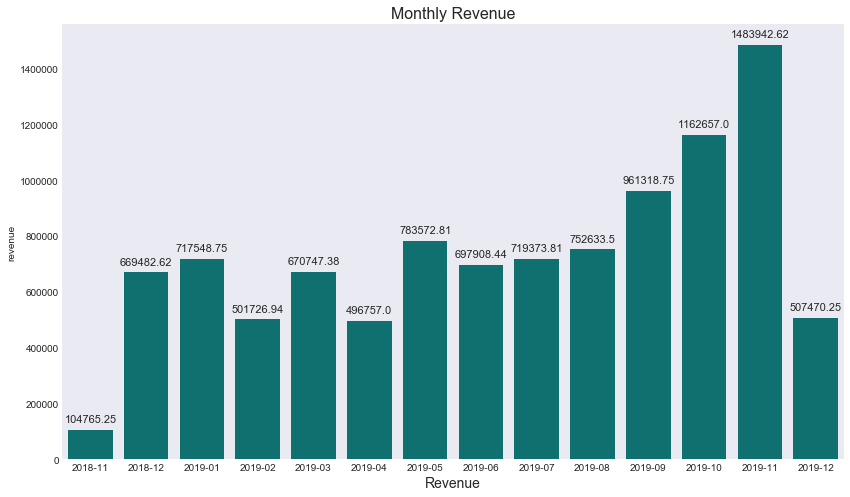

In [59]:
# Plotting monthly revenue

fig, ax = plt.subplots(figsize=(14,8))
sns.barplot(data=revenue, x='label', y='revenue', color='teal')

# Creating label on top of each bar
for row in revenue.itertuples():
    ax.text(row.Index, 
            row.revenue+20000, 
            s=round(row.revenue, 2), 
            horizontalalignment='center',
            verticalalignment='bottom', fontdict={'size':11})

plt.title('Monthly Revenue', fontdict={'size':16})
plt.xlabel('Year-Month', fontdict={'size':14})
plt.xlabel('Revenue', fontdict={'size':14})
plt.show()

The figure shows that we were getting growing revenues until November 2019 when it reached its peak at
1,483,943 and drastically declined to 507,470 the following month.

### Percent Growth <a class="anchor" id="step_4_2"></a>

Percent Growth shows how much revenue changes every month in percentage compared to the previous month's revenue. A positive value means that we earn more income than last month. On the contrary, a negative value means we lost money. The figure is calculated by the change of revenue each month divided by the previous month's income. Panda already has the method to calculate the percent change,`.pct_change`, that we can use readily.

In [60]:
# Calculating percent growth
revenue['growth'] = revenue['revenue'].pct_change().fillna(0)
revenue['color'] = revenue['growth'].apply(lambda x: 'firebrick' if x < 0 else 'forestgreen')
revenue

,year,month,revenue,invoice_date,label,growth,color
0,2018,11,1.047652e+05,2018-11-29 08:26:00,2018-11,0.000000,forestgreen
1,2018,12,6.694826e+05,2018-12-01 09:31:00,2018-12,5.390312,forestgreen
2,2019,1,7.175488e+05,2019-01-02 10:00:00,2019-01,0.071796,forestgreen
3,2019,2,5.017269e+05,2019-02-01 08:18:00,2019-02,-0.300777,firebrick
4,2019,3,6.707474e+05,2019-03-01 08:24:00,2019-03,0.336877,forestgreen
5,2019,4,4.967570e+05,2019-04-01 10:10:00,2019-04,-0.259398,firebrick
6,2019,5,7.835728e+05,2019-05-01 08:35:00,2019-05,0.577376,forestgreen
7,2019,6,6.979084e+05,2019-06-01 07:48:00,2019-06,-0.109325,firebrick
8,2019,7,7.193738e+05,2019-07-01 10:11:00,2019-07,0.030757,forestgreen
9,2019,8,7.526335e+05,2019-08-01 08:21:00,2019-08,0.046234,forestgreen


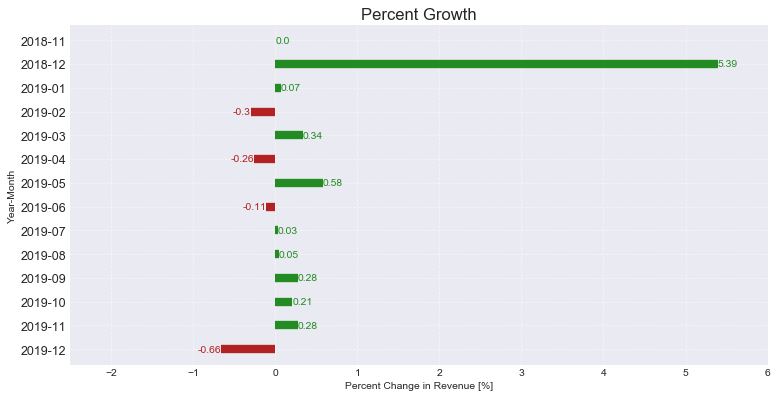

In [61]:
plt.figure(figsize=(12,6), dpi= 75)
plt.hlines(y=revenue.label, xmin=0, xmax=revenue.growth, linewidth=8, color=revenue.color)
for x, y, tex in zip(revenue.growth, revenue.label, revenue.growth):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'firebrick' if x < 0 else 'forestgreen', 'size':10})

# Decorations    
plt.yticks(revenue.index, revenue.label, fontsize=12)
plt.gca().invert_yaxis()
plt.title('Percent Growth', fontdict={'size':16})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 6.0);
plt.xlabel('Percent Change in Revenue [%]')
plt.ylabel('Year-Month');

We got the most significant revenue growth in the second month, where the change reached 5.3% from the previous month. Though, unfortunately, the sales only generated not more than 1% growth months after. Furthermore, we get a rather significant loss in December 2019, where the percent difference is -0.66%.

### Average Check <a class="anchor" id="step_4_3"></a>

The average check is the number of invoices in a month divided by the number of paying customers. This indicator shows how many transactions per person made in a particular month.

To find the number of invoices in amount, we first group the data by `year`, `month`, and `invoice_no` and count only the number of invoices with `quantity` at least one.

In [62]:
# Finding the number of invoices per month
invoice = (clean_data
           .groupby(['year', 'month', 'invoice_no'])
           .agg({'quantity':'count', 'invoice_date':pd.Series.min})
           .reset_index()
           .query('quantity > 0')
           .groupby(['year', 'month'])
           .agg({'invoice_no':'count', 'invoice_date':'min'})
           .reset_index()
        )
invoice['label'] = invoice['invoice_date'].dt.strftime('%Y-%m')
invoice

,year,month,invoice_no,invoice_date,label
0,2018,11,278,2018-11-29 08:26:00,2018-11
1,2018,12,1343,2018-12-01 09:31:00,2018-12
2,2019,1,1243,2019-01-02 10:00:00,2019-01
3,2019,2,1094,2019-02-01 08:18:00,2019-02
4,2019,3,1494,2019-03-01 08:24:00,2019-03
5,2019,4,1245,2019-04-01 10:10:00,2019-04
6,2019,5,1797,2019-05-01 08:35:00,2019-05
7,2019,6,1523,2019-06-01 07:48:00,2019-06
8,2019,7,1549,2019-07-01 10:11:00,2019-07
9,2019,8,1455,2019-08-01 08:21:00,2019-08


We use a similar method to find the number of customers that made a transaction every month,

In [63]:
# Finding the number of customers per month
customer = (clean_data
            .groupby(['year', 'month', 'customer_id'])
            .agg({'invoice_no':'count', 'invoice_date':'min'})
            .reset_index()
            .query('invoice_no > 0')
            .groupby(['year', 'month'])
            .agg({'customer_id':'count', 'invoice_date':'min'})
            .reset_index()
            )
customer['label'] = customer['invoice_date'].dt.strftime('%Y-%m')
customer

,year,month,customer_id,invoice_date,label
0,2018,11,182,2018-11-29 08:26:00,2018-11
1,2018,12,630,2018-12-01 09:31:00,2018-12
2,2019,1,592,2019-01-02 10:00:00,2019-01
3,2019,2,551,2019-02-01 08:18:00,2019-02
4,2019,3,694,2019-03-01 08:24:00,2019-03
5,2019,4,604,2019-04-01 10:10:00,2019-04
6,2019,5,708,2019-05-01 08:35:00,2019-05
7,2019,6,664,2019-06-01 07:48:00,2019-06
8,2019,7,696,2019-07-01 10:11:00,2019-07
9,2019,8,614,2019-08-01 08:21:00,2019-08


In [64]:
# Merging the dataframes
check = pd.merge(invoice, customer, on=['year', 'month','label', 'invoice_date'], how='left')
check.columns = ['year', 'month', 'n_invoice', 'invoice_date', 'label', 'n_customer']

# Calculating the average check
check['check'] = check['n_invoice']/check['n_customer']
check

,year,month,n_invoice,invoice_date,label,n_customer,check
0,2018,11,278,2018-11-29 08:26:00,2018-11,182,1.527473
1,2018,12,1343,2018-12-01 09:31:00,2018-12,630,2.131746
2,2019,1,1243,2019-01-02 10:00:00,2019-01,592,2.099662
3,2019,2,1094,2019-02-01 08:18:00,2019-02,551,1.985481
4,2019,3,1494,2019-03-01 08:24:00,2019-03,694,2.152738
5,2019,4,1245,2019-04-01 10:10:00,2019-04,604,2.061258
6,2019,5,1797,2019-05-01 08:35:00,2019-05,708,2.538136
7,2019,6,1523,2019-06-01 07:48:00,2019-06,664,2.293675
8,2019,7,1549,2019-07-01 10:11:00,2019-07,696,2.225575
9,2019,8,1455,2019-08-01 08:21:00,2019-08,614,2.369707


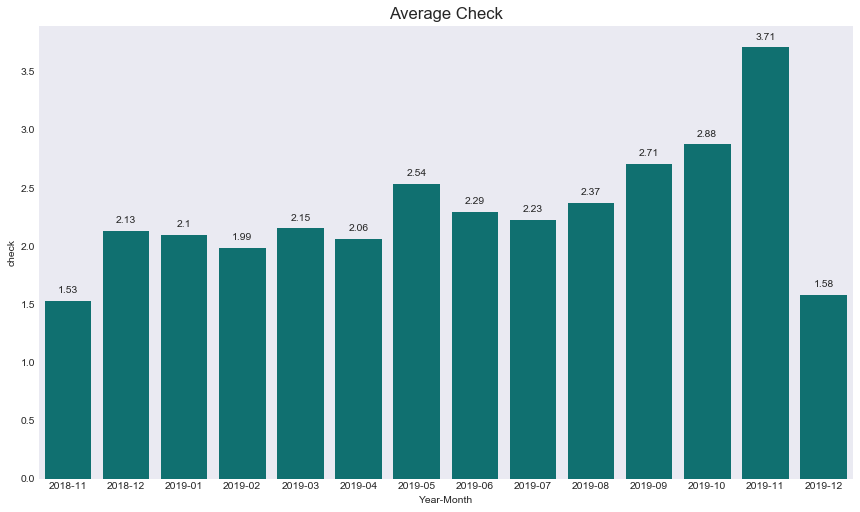

In [65]:
# Plotting the average check
fig, ax = plt.subplots(figsize=(14,8), dpi=75)
sns.barplot(data=check, x='label', y='check', color='teal')

# Creating label on top of each bar
for row in check.itertuples():
    ax.text(row.Index, 
            row.check+0.05, 
            s=round(row.check, 2), 
            horizontalalignment='center',
            verticalalignment='bottom')
    
plt.title('Average Check', fontdict={'size':16})
plt.xlabel('Year-Month')
plt.show()

In [66]:
print('The average check is {:.2f}'.format(check.check.mean()))

The average check is 2.30


In general, our customers generate an average check of 2.30. The highest figure was in November 2019 where there are 3.71 invoices per user. However, there was a massive drop in the month after, where the sales made only 1.58 invoices per user.

### Average Revenue Per Paying User (ARPPU) <a class="anchor" id="step_4_4"></a>

Average Revenue Per Paying User (ARPPU) is the metric that shows how much money a single user makes. The figure is calculated by dividing the revenue by the number of paying customers per month.

We have calculated the `revenue` and `customer` dataframes before,

In [67]:
# Displaying the `revenue` dataframe
revenue.head(3)

,year,month,revenue,invoice_date,label,growth,color
0,2018,11,104765.250,2018-11-29 08:26:00,2018-11,0.000000,forestgreen
1,2018,12,669482.625,2018-12-01 09:31:00,2018-12,5.390312,forestgreen
2,2019,1,717548.750,2019-01-02 10:00:00,2019-01,0.071796,forestgreen


In [68]:
# Displaying the `customer` dataframe
customer.head(3)

,year,month,customer_id,invoice_date,label
0,2018,11,182,2018-11-29 08:26:00,2018-11
1,2018,12,630,2018-12-01 09:31:00,2018-12
2,2019,1,592,2019-01-02 10:00:00,2019-01


In [69]:
# Calculating the ARPPU
arppu = pd.merge(revenue, customer, on=['year', 'month', 'invoice_date', 'label'], how='left')
arppu.columns = ['year', 'month', 'revenue', 'invoice_date', 'label', 'growth', 'color', 'n_customer']
arppu['arppu'] = arppu['revenue']/arppu['n_customer']
arppu

,year,month,revenue,invoice_date,label,growth,color,n_customer,arppu
0,2018,11,1.047652e+05,2018-11-29 08:26:00,2018-11,0.000000,forestgreen,182,575.633242
1,2018,12,6.694826e+05,2018-12-01 09:31:00,2018-12,5.390312,forestgreen,630,1062.670833
2,2019,1,7.175488e+05,2019-01-02 10:00:00,2019-01,0.071796,forestgreen,592,1212.075591
3,2019,2,5.017269e+05,2019-02-01 08:18:00,2019-02,-0.300777,firebrick,551,910.575204
4,2019,3,6.707474e+05,2019-03-01 08:24:00,2019-03,0.336877,forestgreen,694,966.494777
5,2019,4,4.967570e+05,2019-04-01 10:10:00,2019-04,-0.259398,firebrick,604,822.445364
6,2019,5,7.835728e+05,2019-05-01 08:35:00,2019-05,0.577376,forestgreen,708,1106.741261
7,2019,6,6.979084e+05,2019-06-01 07:48:00,2019-06,-0.109325,firebrick,664,1051.066924
8,2019,7,7.193738e+05,2019-07-01 10:11:00,2019-07,0.030757,forestgreen,696,1033.583064
9,2019,8,7.526335e+05,2019-08-01 08:21:00,2019-08,0.046234,forestgreen,614,1225.787459


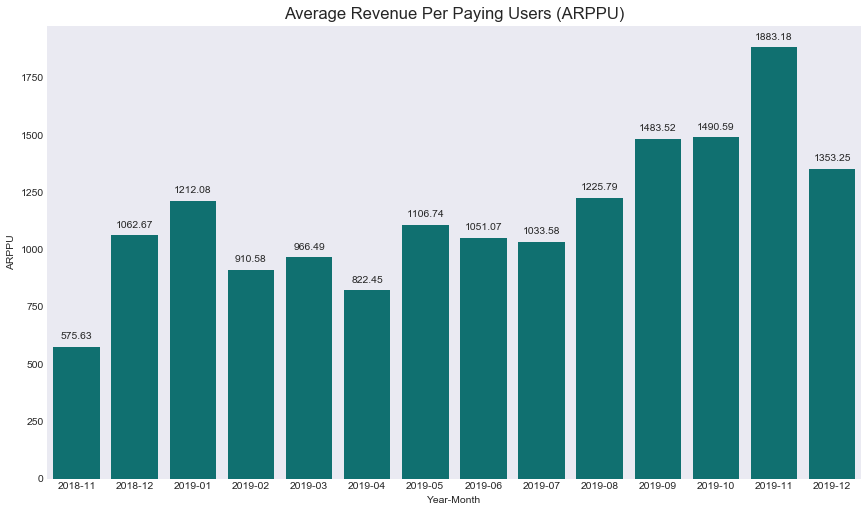

In [70]:
# Plotting the ARPPU
fig, ax = plt.subplots(figsize=(14,8), dpi=75)
sns.barplot(data=arppu, x='label', y='arppu', color='teal')

# Creating label on top of each bar
for row in arppu.itertuples():
    ax.text(row.Index, 
            row.arppu+25, 
            s=round(row.arppu, 2), 
            horizontalalignment='center',
            verticalalignment='bottom')

plt.title('Average Revenue Per Paying Users (ARPPU)', fontdict={'size':16})
plt.xlabel('Year-Month')
plt.ylabel("ARPPU")
plt.show()

In [71]:
print('The average revenue per paying user (ARPPU) is {:.2f}'.format(arppu.arppu.mean()))

The average revenue per paying user (ARPPU) is 1155.54


The graph above shows how much money a single user made from their purchase. In general, we can say that one customer generates 1155 of revenue. The top ARPPU was on November 2019 with 1883 points.

### Average Revenue Per Unit (ARPU) <a class="anchor" id="step_4_5"></a>

Average Revenue Per Unit is the amount of money we can expect to receive from selling a single product. It is calculated by dividing the monthly revenue by the number of products sold in a month.

We get the number of product by calculating the sum of product `quantity` om each month,

In [72]:
# Calculating the quantity if products sold
quantity = (clean_data
             .groupby(['year', 'month', 'stock_code'])
             .agg({'quantity':'sum', 'invoice_date':'min'})
             .reset_index()
             .groupby(['year', 'month'])
             .agg({'quantity':'sum', 'invoice_date':'min'})
             .reset_index()
            )
quantity['label'] = quantity['invoice_date'].dt.strftime('%Y-%m')
quantity

,year,month,quantity,invoice_date,label
0,2018,11,58127,2018-11-29 08:26:00,2018-11
1,2018,12,302266,2018-12-01 09:31:00,2018-12
2,2019,1,420922,2019-01-02 10:00:00,2019-01
3,2019,2,280917,2019-02-01 08:18:00,2019-02
4,2019,3,380226,2019-03-01 08:24:00,2019-03
5,2019,4,296206,2019-04-01 10:10:00,2019-04
6,2019,5,419083,2019-05-01 08:35:00,2019-05
7,2019,6,375286,2019-06-01 07:48:00,2019-06
8,2019,7,424104,2019-07-01 10:11:00,2019-07
9,2019,8,442878,2019-08-01 08:21:00,2019-08


In [73]:
# Merging the dataframes and calculating the ARPU
arpu = pd.merge(quantity, revenue, on=['year', 'month', 'invoice_date', 'label'], how='left')
arpu['arpu'] = arpu['revenue']/arpu['quantity']
arpu

,year,month,quantity,invoice_date,label,revenue,growth,color,arpu
0,2018,11,58127,2018-11-29 08:26:00,2018-11,1.047652e+05,0.000000,forestgreen,1.802351
1,2018,12,302266,2018-12-01 09:31:00,2018-12,6.694826e+05,5.390312,forestgreen,2.214879
2,2019,1,420922,2019-01-02 10:00:00,2019-01,7.175488e+05,0.071796,forestgreen,1.704707
3,2019,2,280917,2019-02-01 08:18:00,2019-02,5.017269e+05,-0.300777,firebrick,1.786033
4,2019,3,380226,2019-03-01 08:24:00,2019-03,6.707474e+05,0.336877,forestgreen,1.764076
5,2019,4,296206,2019-04-01 10:10:00,2019-04,4.967570e+05,-0.259398,firebrick,1.677066
6,2019,5,419083,2019-05-01 08:35:00,2019-05,7.835728e+05,0.577376,forestgreen,1.869732
7,2019,6,375286,2019-06-01 07:48:00,2019-06,6.979084e+05,-0.109325,firebrick,1.859671
8,2019,7,424104,2019-07-01 10:11:00,2019-07,7.193738e+05,0.030757,forestgreen,1.696220
9,2019,8,442878,2019-08-01 08:21:00,2019-08,7.526335e+05,0.046234,forestgreen,1.699415


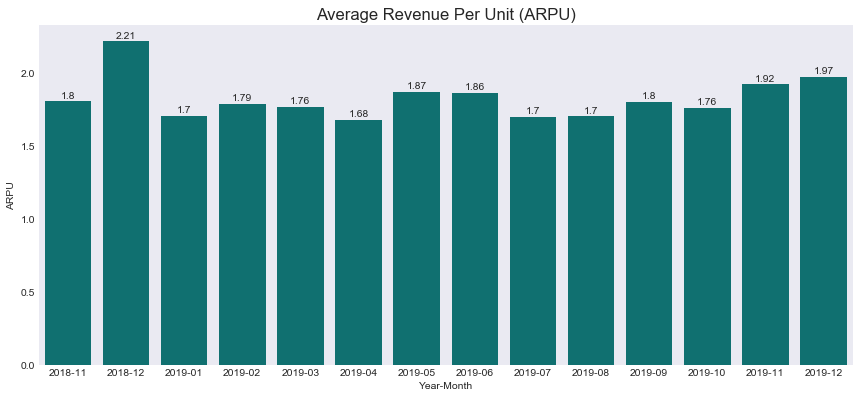

In [74]:
fig, ax = plt.subplots(figsize=(14,6), dpi=75)
sns.barplot(data=arpu, x='label', y='arpu', color='teal')

for row in arpu.itertuples():
    ax.text(row.Index, 
            row.arpu+0.01, 
            s=round(row.arpu, 2), 
            horizontalalignment='center',
            verticalalignment='bottom')
    
plt.title('Average Revenue Per Unit (ARPU)', fontdict={'size':16})
plt.xlabel('Year-Month')
plt.ylabel('ARPU')
plt.show()

In [75]:
print('The average revenue per user (ARPU) is {:.2f}'.format(arpu.arpu.mean()))

The average revenue per user (ARPU) is 1.82


The graph shows that the sales generate a relatively stable revenue per unit, which on average is 1.82. There is a relatively high figure in December 2018, where the ARPU was 2.21 points.

<div class="alert alert-success">
Good KPI-analysis!
 </div>

### Product Performace <a class="anchor" id="step_4_6"></a>

The following functions is used to show the number of top `n` products based on revenue,

In [76]:
def show_top(n_highest):
    '''
    Description:
    Display of top n products based on revenue.
    '''
    result = (clean_data
              .groupby(['stock_code', 'description'])
              .sum()['revenue']
              .sort_values(ascending=False)
              .head(n_highest).reset_index()
             )
    fig, ax = plt.subplots(figsize=(10,round(n_highest*0.5)), dpi=75)
    sns.barplot(data=result, y=result.description.map(lambda x: x.title()), x='revenue', color='teal', orient='h')
    
    for row in result.itertuples():
        ax.text(row.revenue+10000,
                row.Index,
                s=round(row.revenue, 2), 
                horizontalalignment='center',
                verticalalignment='bottom')
    plt.title('The Top {} Products Based on Revenue'.format(n_highest), fontdict={'size':16})
    plt.xlabel('Revenue')
    plt.xlim(0, result.revenue.max()+25000)
    plt.ylabel('Item Name')
    plt.show()
    

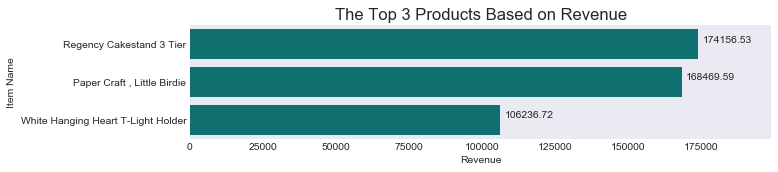

In [77]:
# Showing the top 3 products
show_top(3)

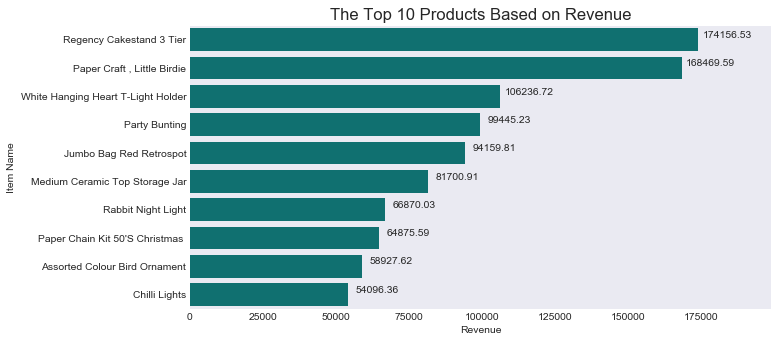

In [78]:
# Showing the top 10 products
show_top(10)

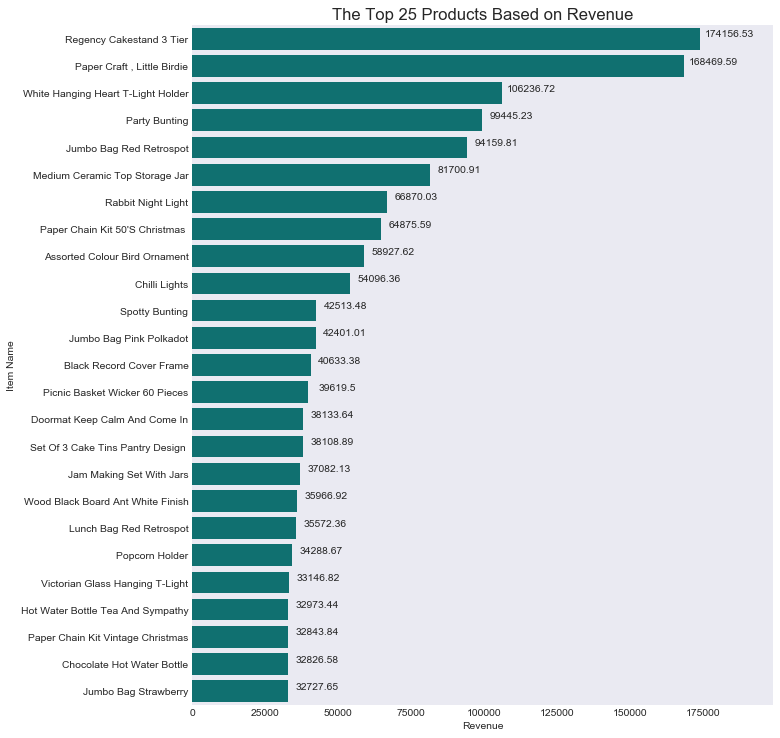

In [79]:
# Showing the top 25 products
show_top(25)

The above figures shows the 3, 10, and 25 top products based on the revenue. Among the top performers are `Regency Cakestand 3 Tier`, `Paper Craft, Little Birdie`, and `White Hanging Heart T-Light Holder`.

### Analysis <a class="anchor" id="step_4_7"></a>

Three of the KPIs show that our most profitable month is November 2019, where we scored the highest revenue, check, and ARPPU. To find out what caused the increased sales, we start by finding the most profitable day and finding out the most purchased product.

To begin, we extract the day information from `invoice_date.`

In [80]:
# Extracting `day` from `invoice_date`
clean_data['day'] = clean_data['invoice_date'].dt.day
clean_data

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,is_alpha,year,month,day,revenue
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17856.0,False,2018,11,29,15.299999
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17856.0,False,2018,11,29,20.340000
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17856.0,False,2018,11,29,22.000000
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29 08:26:00,3.39,17856.0,False,2018,11,29,20.340000
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29 08:26:00,3.39,17856.0,False,2018,11,29,20.340000
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2019-12-07 12:50:00,0.85,12680.0,False,2019,12,7,10.200001
541905,581587,22899,children's apron dolly girl,6,2019-12-07 12:50:00,2.10,12680.0,False,2019,12,7,12.599999
541906,581587,23254,childrens cutlery dolly girl,4,2019-12-07 12:50:00,4.15,12680.0,False,2019,12,7,16.600000
541907,581587,23255,childrens cutlery circus parade,4,2019-12-07 12:50:00,4.15,12680.0,False,2019,12,7,16.600000


Now we find the day with the highest revenue,

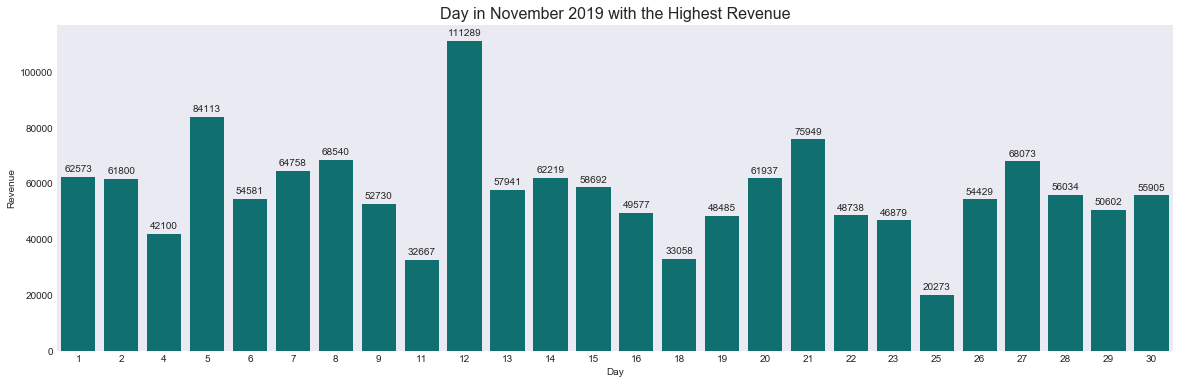

In [81]:
# Finding the day in November 2019 with the highest revenue
day_revenue = clean_data.query('year == 2019 and month == 11').groupby(['day']).sum()['revenue'].reset_index()

# Plotting the graph
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(data=day_revenue, x='day', y='revenue', color='teal')

for row in day_revenue.itertuples():
    ax.text(row.Index, 
            row.revenue+1000, 
            s=round(row.revenue), 
            horizontalalignment='center',
            verticalalignment='bottom')
    
plt.title('Day in November 2019 with the Highest Revenue', fontdict={'size':16})
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.show()

The graph shows that the most profitable day is day 12. We can find out what is the most profitable item purchased on that day

In [82]:
# Finding the most profitable items sold in Nov 12, 2019
(clean_data
 .query('year == 2019 and month == 11')
 .groupby(['day', 'stock_code'])
 .sum()
 .reset_index()
 .query('day == 12')
 .groupby('stock_code')
 .sum()
 .sort_values(by='revenue', ascending=False)
 .head()
)

,day,quantity,unit_price,year,month,revenue
stock_code,,,,,,
22086,12,914,46.830002,26247,143,5483.700195
23084,12,686,51.860001,44418,242,2774.579834
22197,12,1767,14.890000,30285,165,2708.030029
22158,12,430,30.040001,16152,88,2552.579834
23344,12,539,25.430000,20190,110,2225.359863


The highest generating item on November 12, 2019, was `stock_code=22086`, which is

In [83]:
print('Item with stock_code 22086: {}'.format(clean_data
                                              .query('stock_code == "22086"')
                                              .description
                                              .unique()[0].title())
     )

Item with stock_code 22086: Paper Chain Kit 50'S Christmas 


It is also interesting to find out what is the most profitable item in the whole month,

In [84]:
# Finding the most profitable items sold in Nov 2019
top_10_nov = (clean_data
              .query('year == 2019 and month == 11')
              .groupby(['day', 'stock_code'])
              .sum()
              .reset_index()
              .groupby('stock_code')
              .sum()
              .sort_values(by='revenue', ascending=False)
              .reset_index()
              .head(10)
             )
top_10_nov

,stock_code,day,quantity,unit_price,year,month,revenue
0,23084,411,14871,1142.049927,1039785,5665,34634.210938
1,22086,411,8106,1334.180054,835866,4554,29559.980469
2,22197,411,13642,253.720001,514845,2805,15148.879883
3,85123A,411,4981,889.849976,545130,2970,14458.470703
4,22423,411,1080,3064.320068,419952,2288,14151.120117
5,22910,411,3675,994.609985,593586,3234,12710.030273
6,23355,411,2420,1621.569946,611757,3333,12245.120117
7,85099B,411,6222,592.309998,504750,2750,12203.360352
8,79321,411,2221,833.019958,232185,1265,12101.739258
9,23344,411,4175,650.809998,563301,3069,11267.819336


Beside item with `stock_code=22086`, item with `stock_code=23084` and `stock_code=22197` also make equally high revenues. We can take ten most profitable items and see what their names are,

In [85]:
# Finding the names
for item in top_10_nov.stock_code:
    print('Item with stock_code={}: {}'.format(item, clean_data.query('stock_code == @item').description.unique()[0].title()))

Item with stock_code=23084: Rabbit Night Light
Item with stock_code=22086: Paper Chain Kit 50'S Christmas 
Item with stock_code=22197: Small Popcorn Holder
Item with stock_code=85123A: White Hanging Heart T-Light Holder
Item with stock_code=22423: Regency Cakestand 3 Tier
Item with stock_code=22910: Paper Chain Kit Vintage Christmas
Item with stock_code=23355: Hot Water Bottle Keep Calm
Item with stock_code=85099B: Jumbo Bag Red Retrospot
Item with stock_code=79321: Chilli Lights
Item with stock_code=23344: Jumbo Bag 50'S Christmas 


We can also find the top products sold in December 2019,

In [86]:
# Finding the most profitable items sold in Nov 2019
top_10_dec = (clean_data
              .query('year == 2019 and month == 12')
              .groupby(['day', 'stock_code'])
              .sum()
              .reset_index()
              .groupby('stock_code')
              .sum()
              .sort_values(by='revenue', ascending=False)
              .reset_index()
              .head(10)
             )

for item in top_10_dec.stock_code:
    print('Item with stock_code={}: {}'.format(item, clean_data.query('stock_code == @item').description.unique()[0].title()))

Item with stock_code=23843: Paper Craft , Little Birdie
Item with stock_code=23084: Rabbit Night Light
Item with stock_code=21137: Black Record Cover Frame
Item with stock_code=22086: Paper Chain Kit 50'S Christmas 
Item with stock_code=22423: Regency Cakestand 3 Tier
Item with stock_code=22197: Small Popcorn Holder
Item with stock_code=22413: Metal Sign Take It Or Leave It 
Item with stock_code=22727: Alarm Clock Bakelike Red 
Item with stock_code=22114: Hot Water Bottle Tea And Sympathy
Item with stock_code=23543: Keep Calm Wall Art 


Therefore we can conclude that the high revenue in November was generated by items related to Christmas decoration. Customers started to make Christmas decorations or gifts in November and bought the supplies from us. This also explains why the revenue in December 2018 dropped since all decorations or giftd supposedly are ready to be sold, and fewer people look for these supplies.

Before moving to the next part, we will merge all the dataframes used in calculating the KPI. Then, we will use the merged dataframes to build visualization in Tableau.

In [87]:
# Displaying the dataframe used in visualizing KPI 
display(revenue.head(3))
display(check.head(3))
display(arppu.head(3))
display(arpu.head(3))

,year,month,revenue,invoice_date,label,growth,color
0,2018,11,104765.250,2018-11-29 08:26:00,2018-11,0.000000,forestgreen
1,2018,12,669482.625,2018-12-01 09:31:00,2018-12,5.390312,forestgreen
2,2019,1,717548.750,2019-01-02 10:00:00,2019-01,0.071796,forestgreen


,year,month,n_invoice,invoice_date,label,n_customer,check
0,2018,11,278,2018-11-29 08:26:00,2018-11,182,1.527473
1,2018,12,1343,2018-12-01 09:31:00,2018-12,630,2.131746
2,2019,1,1243,2019-01-02 10:00:00,2019-01,592,2.099662


,year,month,revenue,invoice_date,label,growth,color,n_customer,arppu
0,2018,11,104765.250,2018-11-29 08:26:00,2018-11,0.000000,forestgreen,182,575.633242
1,2018,12,669482.625,2018-12-01 09:31:00,2018-12,5.390312,forestgreen,630,1062.670833
2,2019,1,717548.750,2019-01-02 10:00:00,2019-01,0.071796,forestgreen,592,1212.075591


,year,month,quantity,invoice_date,label,revenue,growth,color,arpu
0,2018,11,58127,2018-11-29 08:26:00,2018-11,104765.250,0.000000,forestgreen,1.802351
1,2018,12,302266,2018-12-01 09:31:00,2018-12,669482.625,5.390312,forestgreen,2.214879
2,2019,1,420922,2019-01-02 10:00:00,2019-01,717548.750,0.071796,forestgreen,1.704707


In [88]:
# Merging the dataset
kpi = pd.merge(arppu, check, on=['year', 'month', 'invoice_date', 'n_customer', 'label'], how='left')
kpi = pd.merge(kpi, arpu, on=['year', 'month', 'invoice_date', 'label', 'growth', 'color', 'revenue'], how='left')

# Rearranging the columns
kpi = kpi[['year', 
             'month', 
             'invoice_date', 
             'label', 
             'n_customer', 
             'revenue', 
             'growth', 
             'n_invoice', 
             'quantity', 
             'check', 
             'arppu', 
             'arpu']]
kpi.head()

,year,month,invoice_date,label,n_customer,revenue,growth,n_invoice,quantity,check,arppu,arpu
0,2018,11,2018-11-29 08:26:00,2018-11,182,104765.2500,0.000000,278,58127,1.527473,575.633242,1.802351
1,2018,12,2018-12-01 09:31:00,2018-12,630,669482.6250,5.390312,1343,302266,2.131746,1062.670833,2.214879
2,2019,1,2019-01-02 10:00:00,2019-01,592,717548.7500,0.071796,1243,420922,2.099662,1212.075591,1.704707
3,2019,2,2019-02-01 08:18:00,2019-02,551,501726.9375,-0.300777,1094,280917,1.985481,910.575204,1.786033
4,2019,3,2019-03-01 08:24:00,2019-03,694,670747.3750,0.336877,1494,380226,2.152738,966.494777,1.764076


### Conclusion <a class="anchor" id="conclusion_4"></a>

We have calculated the monthly revenue, monthly growth, average check, average revenue per paying user (ARPPU), average revenue per unit (ARPU), and product performance. From the indicators, we learned that the sales performed very well; it scored 5.3% growth in December 2018  and kept growing until November 2019 where it reached the highest revenue of 1,483,943. The average revenue per paying unit (ARPPU) also scored the highest this month, with 1891 points. However, the following month showed an interesting phenomenon where sales dropped -0.66% and only earned 507,470. The average check and ARPPU also present a similar trend. The ARPU, on the other hand, is relatively steady throughout the year, with an average of 2.21 points. We have also displayed the top 3, 10, and 25 products based on revenue in the last section of this analysis.

In November 2019, most of our customers bought Christmas decorations, which boost revenue. Furthermore, it also explains why the revenue dropped drastically in the following month.

## Step 5: Product Range Analysis <a class="anchor" id="step_5"></a>

### Finding Items Commonly Sold In Bundles  <a class="anchor" id="step_5_1"></a>

In the first part of the product range analysis, we would like to know which products are typically sold in bundles. After exploring the dataset, we found out that these items are indicated in the `description`. Take as an example item with `stock_code==23191`,

In [89]:
clean_data.query('stock_code == "23191"')['description'].unique()[0]

'bundle of 3 retro note books'

The description tells us that the item is already sold in a bundle. Many other descriptors in the product's name indicate that the products are sold in groups. The indicators include the words such as  `set of`, `box of`, `pack of`, `bundle of`. We can search the `description` column and mark the row if the keyword appears in the item name.

In [90]:
# Creating a boolean column to find a row that consist of the keywords
keywords = ['box of', 'set of', 'pack of', 'bundle of']

clean_data['is_bundle'] = (clean_data['description']
                           .apply(lambda x: True if any(w in x for w in keywords) else False))

clean_data.head(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,is_alpha,year,month,day,revenue,is_bundle
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17856.0,False,2018,11,29,15.299999,False
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17856.0,False,2018,11,29,20.340000,False
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17856.0,False,2018,11,29,22.000000,False


Then using `Counter()`, we can calculate the number of occurrences of items where the `is_bundle` column is `True` and sort them decreasingly. The following are the top five items that are commonly sold in bundles (groups).

In [91]:
Counter(clean_data.query('is_bundle == True')['description']).most_common(5)

[('set of 3 cake tins pantry design ', 1394),
 ('pack of 72 retrospot cake cases', 1352),
 ('set of 4 pantry jelly moulds', 1090),
 ('pack of 60 pink paisley cake cases', 880),
 ('set of 3 regency cake tins', 876)]

We can also find the ratio between items that are sold individually against those  sold in bundles,

In [92]:
clean_data['is_bundle'].value_counts()

False    476498
True      46779
Name: is_bundle, dtype: int64

### Finding Product Categories <a class="anchor" id="step_5_2"></a>

The dataset provides us with the item names under the `description` column. There is, however, no other column that we can use to label which category an item belongs to. Consequently, we have to consider methods used in unsupervised machine learning to help us find item groupings. 

In the Natural Language Processing domain, a technique called Topic Modelling aims to discover the topic in a collection of documents,  which is quite similar to our objective. The model uses the method known as Latent Dirichlet Allocation, which assumes that a document consists of a collection of topics in a certain proportion. And each topic is a collection of keywords in a certain proportion. The method groups keywords based on the given suggested number of topics and calculate how much each keyword contributes to a particular topic. 

We will implement Topic Modelling in this analysis. To help us, we will a library called `Gensim`, which is built for topic modeling. In addition, we will use another tool to visualize the topic models called `pyLDAviz`. The steps that we are going to take are the following:
1. Preprocess the input text by tokenizing the text into a smaller unit, removing the stop words, stemming, and lemmatizing the remaining words.
2. Create a Gensim dictionary and a corpus as a main input for the LDA model.
3. Run the LDA model by giving the model an initial guess of the number of topics, the dictionary, and the corpus.
4. Visualize the model output using `pyLDAviz`.
5. Evaluate the model output by calculating the coherence model.
6. Reiterate the modeling using a different number of topics until we find the best coherence model.

To better understand our workflow, let's take one data as an example,

In [93]:
# Taking a sample
sample = clean_data.description[0]
sample

'white hanging heart t-light holder'

We use NTLK's `stopwords` library to filter out the common words. In this analysis, we add some words that refer to color to the stop words list since they frequently appear in the item description even though they don't seem to help us categorize the item.

In [94]:
# Adding new words to NLTK's stopword's list
stop_words = stopwords.words('english')
stop_words.extend(['white', 'black', 'blue', 'green', 'red', 'yellow', 'orange', 'gold', 'silver', 'brown', 'gray', 'purple', 'pink'])

The first step is to clean the text by splitting the input text into individual words. After that, we filter out the stop words, then stemming and lemmatizing the remaining words.

In [95]:
# Create a lemmatizer and stemmer function
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='n'))

# Creating a pipeline to preprocess text
def preprocess(text):
    '''
    Description: 
    Convert text input into Gensim's token, apply the stop words, lemmatize and stem the token
    '''
    result = []
    
    # Splitting text into words
    split = text.split(' ')
    
    for i in split:
        
        # Gensim has a method to tokenize a word called simple_process
        for token in gensim.utils.simple_preprocess(i) :
            
            # Excluding stop words and token too short
            if token not in stop_words and len(token) > 3:
                result.append(lemmatize_stemming(token))
    return result

stemmer = SnowballStemmer('english')

In [96]:
# Preprocess the sample text
word = preprocess(sample)
word

['hang', 'heart', 'light', 'holder']

The `preprocess` function converts the input `white hanging heart t-light holder` into four tokens `hang`, `heart`, `light`, `holder`.

The next step is to pass the tokens into the Gensim dictionary and create a corpus for input to the LDA model. 

In [97]:
# Creating a Gensim dictionary
id2word = gensim.corpora.Dictionary([word])

# Creating a corpus from the dictionaruy using the bag-of-words method
corpus = id2word.doc2bow(word)
corpus

[(0, 1), (1, 1), (2, 1), (3, 1)]

The corpus creates a unique id for each token in the list and marks how many times they occur. For example, in the output above, (0,1) means that the word with id 0 occurs once in the list. Likewise, the word with id 1 also appears once, and so on. 

We can also see the corpus in a human-readable format in the following,

In [98]:
[(id2word[id], freq) for id, freq in corpus]

[('hang', 1), ('heart', 1), ('holder', 1), ('light', 1)]

We can rewrite the steps above into a new function called `get_corpus` as follows,

In [99]:
def get_corpus(df):
    words = [preprocess(line) for line in df.description]
    id2word = gensim.corpora.Dictionary(words)
    
    # Filter out any tokens that occur less than 10 times and no more that 35% of the corpus size
    id2word.filter_extremes(no_below=10, no_above=0.35)
    
    # Removing any gaps
    id2word.compactify()
    
    # Creating the corpus
    corpus = [id2word.doc2bow(text) for text in words]
    return corpus, id2word, words

Now let's feed in the item description from the `clean_data` dataframe into the `get_corpus` function to create required inputs for the model.

In [100]:
np.random.seed(0)

# Creating a corpus and dictionary from the input text
corpus, id2word, words = get_corpus(clean_data)

Finally, run the LDA model using the `corpus` and dictionary `id2word` from `get_corpus`. The model requires prior knowledge of the number of topics the document might have. As an initial guess, we assume that there are 10 product categories.

In [101]:
# Running the LDA model
lda_model =  gensim.models.LdaMulticore(corpus, num_topics=10, id2word = id2word, passes=2, workers=2)

from pprint import pprint

# Visualizing outputs from the model
for idx, topic in lda_model.print_topics(-1):
    pprint('Topic: {} Words: {}'.format(idx, topic))

('Topic: 0 Words: 0.115*"light" + 0.086*"heart" + 0.084*"decor" + '
 '0.068*"holder" + 0.064*"hang" + 0.058*"star" + 0.057*"wooden" + '
 '0.037*"glass" + 0.037*"bell" + 0.029*"antiqu"')
('Topic: 1 Words: 0.213*"christma" + 0.122*"vintag" + 0.088*"card" + '
 '0.034*"tree" + 0.023*"union" + 0.022*"cover" + 0.021*"travel" + 0.018*"jack" '
 '+ 0.016*"frame" + 0.016*"birthday"')
('Topic: 2 Words: 0.077*"home" + 0.053*"wrap" + 0.047*"bird" + 0.044*"assort" '
 '+ 0.043*"gift" + 0.043*"doormat" + 0.041*"keep" + 0.041*"calm" + '
 '0.036*"sweet" + 0.034*"magnet"')
('Topic: 3 Words: 0.059*"mini" + 0.049*"tissu" + 0.048*"rose" + 0.041*"regenc" '
 '+ 0.038*"woodland" + 0.036*"craft" + 0.031*"notebook" + 0.030*"cream" + '
 '0.029*"babushka" + 0.029*"roll"')
('Topic: 4 Words: 0.088*"paper" + 0.077*"candl" + 0.062*"spaceboy" + '
 '0.058*"polkadot" + 0.046*"children" + 0.038*"chain" + 0.035*"retrospot" + '
 '0.034*"bunt" + 0.028*"plate" + 0.022*"rose"')
('Topic: 5 Words: 0.137*"heart" + 0.075*"small" +

The LDA model gives out ten topics with the probability of words that makes up each topic. As an example, in Topic 0 the 'light' keyword contributes 11.7% to the topic, 'heart' contributes 9%, 'decor' 8.5%, and so on.

One important thing to note is that the LDA model does not assign any title to the output topics. Therefore, we have to name them manually.

As mentioned above, we can use `pyLDAviz` to visualize the topic models.

In [102]:
# Visualizing the topic model using pyLDAvuz library
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.186695 -0.172579       1        1  14.092571
0      0.298324 -0.071047       2        1  11.846062
1     -0.220736  0.071006       3        1  10.498434
5      0.264423 -0.068917       4        1  10.076397
9     -0.044567 -0.109301       5        1   9.877771
6     -0.109381  0.249120       6        1   9.213978
4     -0.042373 -0.192683       7        1   8.987330
2     -0.003882 -0.007473       8        1   8.905649
3     -0.071640 -0.009989       9        1   8.469184
7      0.116527  0.311863      10        1   8.032624, topic_info=         Term          Freq         Total Category  logprob  loglift
95   christma  37627.000000  37627.000000  Default  30.0000  30.0000
1       heart  40375.000000  40375.000000  Default  29.0000  29.0000
85     design  25603.000000  25603.000000  Default  28.0000  28.0000
3       light  22956.000000  22956.000000  Default  27.0000  27.0000
5       metal  20426.000000  20426.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
401     child   1546.402543   1918.710039  Topic10  -4.4717   2.3059
241     diner   1439.985833   1767.076426  Topic10  -4.5430   2.3170
40      ivori   3960.484396   7505.627724  Topic10  -3.5313   1.8824
199    chocol   2395.625158   4584.291332  Topic10  -4.0340   1.8727
203      tabl   1549.856675   3193.341903  Topic10  -4.4695   1.7988

[436 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
154       5  0.999134   acryl
449       9  0.999572  advent
149       3  0.997421  airlin
149       7  0.001922  airlin
59       10  0.999758   alarm
...     ...       ...     ...
383       8  0.999852    wrap
448       5  0.999528  wreath
309       5  0.999331   write
181       2  0.992001    zinc
181       9  0.007873    zinc

[488 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 1, 2, 6, 10, 7, 5, 3, 4, 8])

The visualization shows several bubbles and bars charts in the main window. Each bubble represents a topic; the larger the bubble, the higher percentage of the words in the corpus is about that topic. Blue bars represent the overall frequency of each word in the corpus. Red bars give the estimated number of times a given topic generates a given term. For example, there are 40,000 counts of the word 'heart' in the corpus, as indicated by the blue bar. Topic 4 generates around 22,000 of them and  Topic 2 around 18,000, as shown by the red bars. 

Additionally, the further the bubbles are away from each other, the more different they are.

The model gives us ten bubbles of the same size. Some bubbles intersect with the other, indicating that there are keywords found in more than one bubble.

To evaluate how good our selection of the number of topics is, we use a coherence model metric.

In [103]:
# Compute Coherence Score
coherence_model = CoherenceModel(model=lda_model, texts=words, dictionary=id2word, coherence='c_v')
coherence_model = coherence_model.get_coherence()
print('Coherence Score: ', coherence_model)

Coherence Score:  0.5893033145176693


The LDA with 10 topic models gives us around 59% coherence. This is a good start as the value is relatively high. Nevertheless, we need to find the optimal number of topics using an iterative method.

In [104]:
np.random.seed(0)

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Description:
    Compute c_v coherence for various number of topics

    Inputs:
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Ouputs:
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=words, start=2, limit=40, step=4)



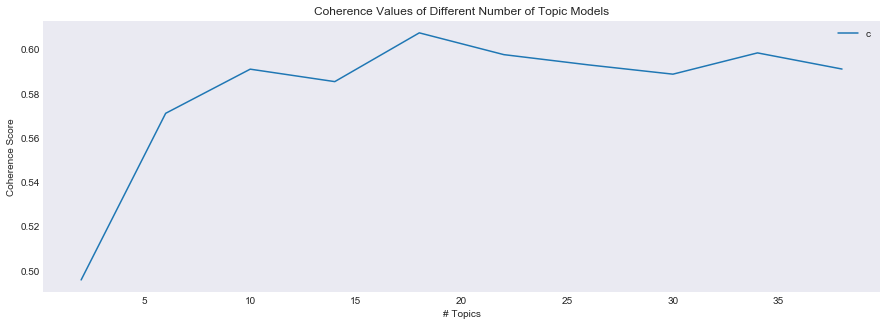

In [105]:
# Showing the graph
limit = 40
start = 2
step = 4
x = range(start, limit, step)

plt.figure(figsize=(15,5))
plt.plot(x, coherence_values)
plt.xlabel("# Topics")
plt.ylabel("Coherence Score")
plt.legend(("coherence_values"), loc='best')
plt.title('Coherence Values of Different Number of Topic Models')
plt.show()

We can find the optimal number of topics and their coherence values as follows, 

In [106]:
best_result_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[best_result_index]

# Select the model and print the topics
model_topics = optimal_model.show_topics(formatted=False)
print('The {} topics gives the highest coherence score of {:.1%}'.format(x[best_result_index], coherence_values[best_result_index]))

# print(f'''The {x[best_result_index]} topics gives the highest coherence score \\
# of {coherence_values[best_result_index]}''')

The 18 topics gives the highest coherence score of 60.7%


Our iterative process suggested that selecting 30 topics give the best coherence score. However, we will stick with 10 topic models since the coherence value is not so much different from our previous collection.
The 30 topics give the highest coherence score of 59.2%.

In [107]:
optimal_model.show_topics(formatted=False)

[(10,
  [('larg', 0.106872015),
   ('heart', 0.1051393),
   ('wicker', 0.06373671),
   ('doormat', 0.05723935),
   ('box', 0.045519),
   ('ceram', 0.043497473),
   ('round', 0.040553633),
   ('strawberri', 0.03841765),
   ('trinket', 0.036117714),
   ('snack', 0.03345954)]),
 (4,
  [('bottl', 0.23760429),
   ('water', 0.20452014),
   ('skull', 0.11532667),
   ('chocol', 0.06169477),
   ('heart', 0.047553215),
   ('wreath', 0.03428456),
   ('scotti', 0.031222697),
   ('hand', 0.02412342),
   ('tonic', 0.020102156),
   ('grey', 0.019020533)]),
 (6,
  [('vintag', 0.25030908),
   ('card', 0.15665352),
   ('jumbo', 0.12988883),
   ('paisley', 0.070143975),
   ('keep', 0.045845333),
   ('birthday', 0.031014742),
   ('shopper', 0.022669611),
   ('plaster', 0.021579258),
   ('tray', 0.02108203),
   ('treasur', 0.019883683)]),
 (9,
  [('girl', 0.1097787),
   ('dolli', 0.10896545),
   ('regenc', 0.072972074),
   ('travel', 0.05544979),
   ('cutleri', 0.048459217),
   ('sew', 0.047997907),
   ('c

The final step is to assign the category to each item in the `description` column. We can use the model and corpus that have been trained to assign the groupings. Concretely take a sample from row 700,

In [108]:
sample_text = clean_data.description[700]
print(sample_text)

metal sign empire tea


If we pass the sample text into the trained `lda_model`, the model will give us ten topics with the probability of the sample text being a part of the topic,

In [109]:
sample_text = preprocess(str(sample_text))
sample_corpus = id2word.doc2bow(sample_text)
sample_topic = list(lda_model[sample_corpus])
pprint(sample_topic)

[(0, 0.025000496),
 (1, 0.025000496),
 (2, 0.025000496),
 (3, 0.025000496),
 (4, 0.27498686),
 (5, 0.025000496),
 (6, 0.52500916),
 (7, 0.025000496),
 (8, 0.025000496),
 (9, 0.025000496)]


As shown above, the sample text has a 52.5% probability of being a part of `Topic 6`, 27.5% of `Topic 4`, and 2.5% of the rest.

Writing these steps into a function,

In [110]:
def topic_prediction(item):
    '''
    Description:
    Find the topic the input text most associated with
    
    Parameters:
    A string type text input
    
    Returns
    The Topic with the highest probability
    '''
    text = preprocess(item)
    corpus = id2word.doc2bow(text)
    output = list(lda_model[corpus])
    topics = sorted(output, key=lambda x: x[1], reverse=True)
    return topics[0][0]

In [111]:
clean_data['category'] = clean_data['description'].apply(topic_prediction)
clean_data

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,is_alpha,year,month,day,revenue,is_bundle,category
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17856.0,False,2018,11,29,15.299999,False,0
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17856.0,False,2018,11,29,20.340000,False,6
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17856.0,False,2018,11,29,22.000000,False,6
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29 08:26:00,3.39,17856.0,False,2018,11,29,20.340000,False,1
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29 08:26:00,3.39,17856.0,False,2018,11,29,20.340000,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2019-12-07 12:50:00,0.85,12680.0,False,2019,12,7,10.200001,True,8
541905,581587,22899,children's apron dolly girl,6,2019-12-07 12:50:00,2.10,12680.0,False,2019,12,7,12.599999,False,8
541906,581587,23254,childrens cutlery dolly girl,4,2019-12-07 12:50:00,4.15,12680.0,False,2019,12,7,16.600000,False,8
541907,581587,23255,childrens cutlery circus parade,4,2019-12-07 12:50:00,4.15,12680.0,False,2019,12,7,16.600000,False,4


We can check the `category` distribution among the product name,

In [112]:
clean_data.category.value_counts()*100/len(clean_data)

8    17.706301
0    12.047157
1    10.362198
5     9.653778
4     9.054096
6     8.918986
9     8.640930
3     8.139857
2     8.053096
7     7.423602
Name: category, dtype: float64

### Group the product categories <a class="anchor" id="step_5_3"></a>

In [113]:
clean_data.groupby('category').count()['invoice_no'].sort_values(ascending=False)

category
8    92653
0    63040
1    54223
5    50516
4    47378
6    46671
9    45216
3    42594
2    42140
7    38846
Name: invoice_no, dtype: int64

The result above suggest that `Topic 8` has the most `invoice_no` with 92,588 invoices which is 17% of the entire data.

### Conclusion <a class="anchor" id="conclusion_5"></a>

In this section, we have identified items sold bundles by selecting several keywords such as `box of`, `set of`, `pack of`, `bundle of`, and search them in the `description` column. As a result, we found 46,779 items sold in groups/bundles and 476,498 sold individually.

Next, we managed to group the products into 10 categories using the Topic Modelling technique known in the Natural Language Processing domain. The method uses a Latent Dirichlet Allocation model that calculates the contribution of words in the item's `description` to each topic. We chose several topic numbers, evaluated them using the coherence model, and decided to use 10 topics/categories.  

Even though we picked 10 categories for the product range, our selection is far from perfect. There are still many ways to improve our model, such as choosing a different hyperparameter, applying the TF-IDF method, utilizing the Gensim LDA Mallet model as suggested by some references, or using the output categories as target labels and run a supervised machine learning method to the dataset. However, due to time restrictions, we keep these options as a future recommendation. One caveat of the technique is that the model does not assign the naming to the output topics/categories. 



## Step 6: Hypothesis Testing  <a class="anchor" id="step_6"></a>

In the last step, we found out that there are products sold as individual items, and there are those that are sold in bundles. In this section, we would like to know if the revenue generated by the two groups is different. Specifically, we would like to evaluate if the items sold in bundles create more revenue than items sold individually. We will use hypothesis testing to compare the average revenue between the two groups.

We begin the analysis by separating the data into two smaller sets, `bundle` for items sold in bundles and `non_bundle` for items sold individually,

In [114]:
# Getting the revenue of items sold in bundles
bundle = clean_data.query('is_bundle == True')['revenue']
bundle.head()

14    25.500000
15    14.849999
16    19.900000
34    70.800003
96    50.399998
Name: revenue, dtype: float32

In [115]:
# Getting the revenue of items sold individually
non_bundle = clean_data.query('is_bundle == False')['revenue']
non_bundle.head()

0    15.299999
1    20.340000
2    22.000000
3    20.340000
4    20.340000
Name: revenue, dtype: float32

Then we can plot the histograms of the new dataframes,

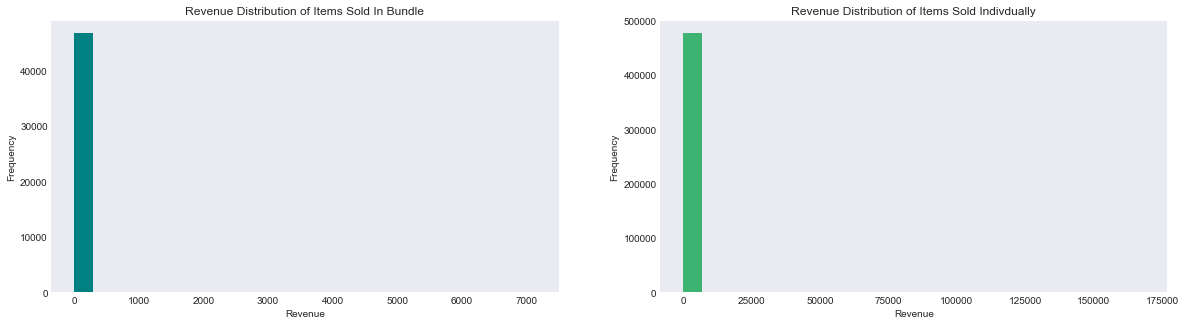

In [116]:
# Plotting the histograms
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
bundle.plot(kind='hist', bins=25, color='teal',
                  title=('Revenue Distribution of Items Sold In Bundle'));
plt.xlabel('Revenue');


plt.subplot(1, 2, 2)
non_bundle.plot(kind='hist', bins=25, color='mediumseagreen',
                  title=('Revenue Distribution of Items Sold Indivdually'));
plt.xlabel('Revenue');


The histograms show that most of the data are concentrated at lower part of the x-axis while some points lie at the far right of the scale. This is the first indication that the distribution is skewed, and possible outliers in the samples. We need to  zoom in  to get a more clear picture of the distributions,

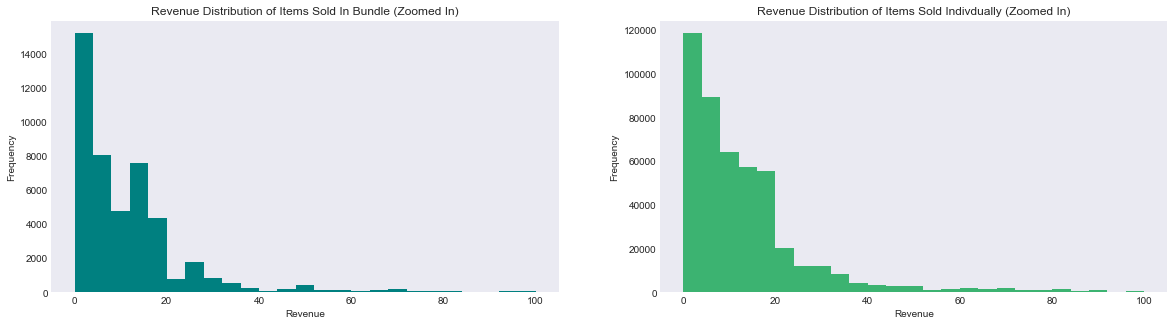

In [117]:
# Zooming in the histograms
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
bundle.plot(kind='hist', bins=25, color='teal', range=(0,100),
                  title=('Revenue Distribution of Items Sold In Bundle (Zoomed In)'));
plt.xlabel('Revenue');


plt.subplot(1, 2, 2)
non_bundle.plot(kind='hist', bins=25, color='mediumseagreen', range=(0,100),
                  title=('Revenue Distribution of Items Sold Indivdually (Zoomed In)'));
plt.xlabel('Revenue');


Now we get a clearer view of the histogram. We can confirm that most samples are distributed around 0 to 40, with the peak around zero.

Next, we will make box plots to verify the presence of outliers,

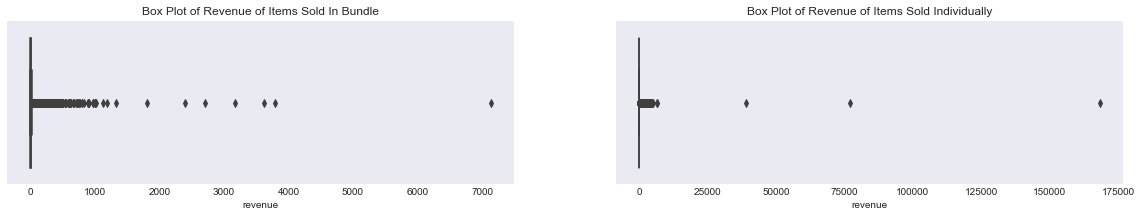

In [118]:
# Plotting boxplots 
fig = plt.figure(figsize=(20, 3))

plt.subplot(1, 2, 1)
sns.boxplot(x=bundle);
plt.title('Box Plot of Revenue of Items Sold In Bundle');

plt.subplot(1, 2, 2);
sns.boxplot(x=non_bundle);
plt.title('Box Plot of Revenue of Items Sold Individually');

The boxplots show that there are lots of samples that lie way above the third quartile. The quartiles of both samples are located near-zero values, but the maximum values are at 7000 or 175,000 for `bundle` and `non_bundle`, respectively. We need to remove the outliers to get a better comparison between the two samples.

In [119]:
# Defining a function that calculates the upper and lower threshold of outliers
def outliers(col):
    '''
    Description:
    Finds the first and third quantile of a distribution
    
    Input:
    A list, array, or series of samples
    
    Output:
    The first and the third quantile
    '''
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    upper = q3 + (1.5 * iqr)
    lower = q1 - (1.5 * iqr)
    return (lower, upper)

We define a function to calculate the outlier thresholds. Then we find the threshold and apply them to the samples. As a result, we get new samples without the outliers.

In [120]:
# Calculating the outlier threshold
_, bundle_upper = outliers(bundle)
_, non_bundle_upper = outliers(non_bundle)

# Applying the threshold to get trimmed down samples
bundle_trimmed = bundle[bundle < bundle_upper]
non_bundle_trimmed = non_bundle[non_bundle < non_bundle_upper]

Plotting again the histograms after removing the outliers,

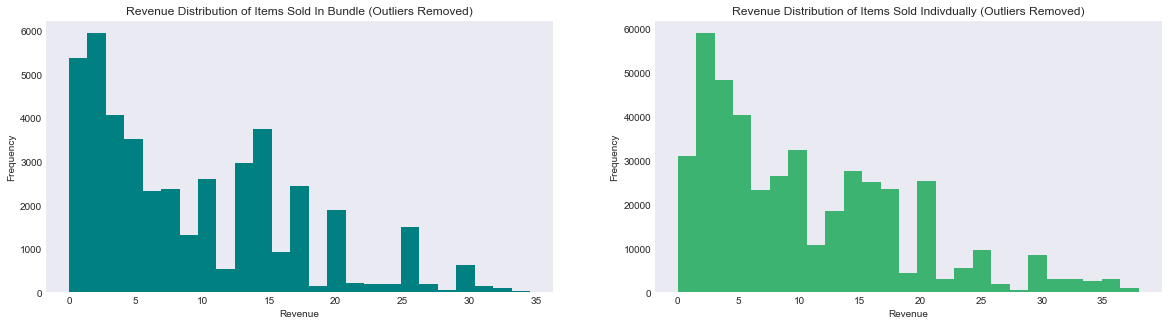

In [121]:
# Plotting the histograms
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
bundle_trimmed.plot(kind='hist', bins=25, color='teal',
                  title=('Revenue Distribution of Items Sold In Bundle (Outliers Removed)'));
plt.xlabel('Revenue');


plt.subplot(1, 2, 2)
non_bundle_trimmed.plot(kind='hist', bins=25, color='mediumseagreen',
                  title=('Revenue Distribution of Items Sold Indivdually (Outliers Removed)'));
plt.xlabel('Revenue');

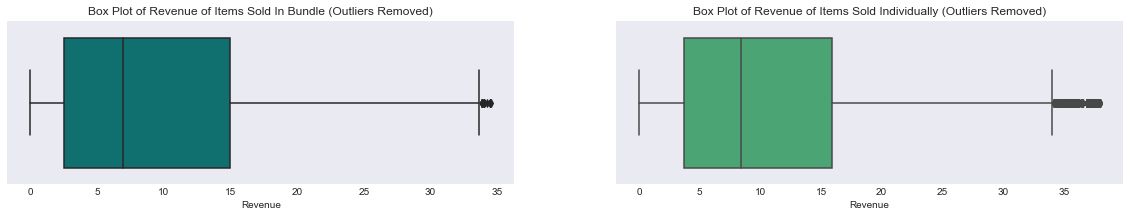

In [122]:
# Diplaying the boxplots
fig = plt.figure(figsize=(20, 3))

plt.subplot(1, 2, 1)
sns.boxplot(x=bundle_trimmed, color='teal')
plt.title('Box Plot of Revenue of Items Sold In Bundle (Outliers Removed)');
plt.xlabel('Revenue');

plt.subplot(1, 2, 2);
sns.boxplot(x=non_bundle_trimmed, color='mediumseagreen')
plt.title('Box Plot of Revenue of Items Sold Individually (Outliers Removed)');
plt.xlabel('Revenue');

The histograms and boxplots show that sample distributions are skewed to the right, with the median between 5 to 10.

Even though it is visually apparent that the distributions are skewed, it is also helpful to verify this statistically. We can use the Shapiro-Wilk Normality Test and define the following null and alternate hypotheses:

   * Null hypothesis, $H_0$: The samples are from the normal (Gaussian) distribution.
   * Alternate hypothesis $H_A$: The samples are not from the normal (Gaussian) distribution.

In [123]:
# Hypothesis testing using the Shapiro-Wilk Test on the `bundle` dataset
_, p_value = shapiro(bundle_trimmed)

if p_value == 0:
    print('p-value < 0.001')
else:
    print('p-value: ', p_value)

alpha = 0.05
if p_value > alpha:
    print('The samples of `bundle` dataset are from the normal (Gaussian) distribution (fail to reject H_0).')
else:
    print('The samples of `bundle` dataset are not from the normal (Gaussian) distribution (reject H_0).')


p-value < 0.001
The samples of `bundle` dataset are not from the normal (Gaussian) distribution (reject H_0).


In [124]:
# Hypothesis testing using the Shapiro-Wilk Test on the `non_bundle` dataset
_, p_value = shapiro(non_bundle_trimmed)

if p_value == 0:
    print('p-value < 0.001')
else:
    print('p-value: ', p_value)

alpha = 0.05
if p_value > alpha:
    print('The samples of `non_bundle` dataset are from the normal (Gaussian) distribution (fail to reject H_0).')
else:
    print('The samples of `non_bundle` dataset are not from the normal (Gaussian) distribution (reject H_0).')


p-value < 0.001
The samples of `non_bundle` dataset are not from the normal (Gaussian) distribution (reject H_0).


The Shapiro-Wilk Tests show that both samples do not have normal distributions. Therefore we cannot use the Student's t-Test for the hypothesis testing since the required assumption of the samples to normally distributed is not satisfied. Consequently, we are going to use the non-parametric Mann-Whitney U Test. We define the following null and alternate hypotheses:

* Null hypothesis, $H_0$: There is no statistically significant difference between the average revenue of the `bundle` dataset and the `non_bundle` dataset.
* Alternate hypothesis $H_A$: There exists a statistically significant difference between the average revenue of the `bundle` dataset and the `non_bundle` dataset.

In [125]:
# Hypothesis testing using the non-parametric method
_, p_value = mannwhitneyu(bundle_trimmed, non_bundle_trimmed)
print('Mann Whitney p-value {}'.format(p_value))

if p_value == 0:
    print('p-value < 0.001')
else:
    print('p-value: ', p_value)

alpha = 0.05
if p_value > alpha:
    print('There is no statistically significant difference between')
    print('the average revenue of the `bundle` dataset and the `non_bundle` dataset (fail to reject H_0)')      
else:
    print('There exists a statistically significant difference')
    print('between the average revenue of the `bundle` dataset and the `non_bundle` dataset. (reject H_0)')

Mann Whitney p-value 2.0478429204900973e-258
p-value:  2.0478429204900973e-258
There exists a statistically significant difference
between the average revenue of the `bundle` dataset and the `non_bundle` dataset. (reject H_0)


In [126]:
print('The average revenue of items sold in bundles: {:.2f}'.format(bundle_trimmed.mean()))

The average revenue of items sold in bundles: 9.25


In [127]:
print('The average revenue of items sold individually: {:.2f}'.format(non_bundle_trimmed.mean()))

The average revenue of items sold individually: 10.57


The non-parametric test suggests that the two distributions are statistically different. The items sold individually generate 10.57 of revenue, which is higher than the average revenues of items sold in bundles, 9.25.

### Conclusion <a class="anchor" id="conclusion_6"></a>

We learned from the hypothesis testing that the items sold individually generate more revenue than items in bundles. One of the reasons for this is that some individual items have a high unit price, as shown in the box plots. This is true even after removing the outliers. In addition, the clear difference between the number of samples between the two groups might also contribute to the result.

## Part 7: Additional Research <a class="anchor" id="step_7"></a>

As additional research, we will build a simple recommender system. The system we are creating is inspired by a method known as Item-Based Collaborative Filtering. The system assumes that customers who purchased the same item are more likely to look for similar items. Concretely, when a customer puts an item `A` in the shopping cart, the system shows the list of other top items other customers who ordered item `A` bought in the past. As a simple example, if a person is looking for a birthday decoration set, the person will likely buy a party balloon.

To implement the idea, first, let's assume a customer buys an item, `stock_code=22169`, and puts it in the shopping cart. Then we find the `n` highest customers who also bought item `22169`,

In [128]:
clean_data.query('stock_code == "22169"')['description'].unique()[0]

'family album white picture frame'

In [129]:
item = '22169'

# Finding the top customers who bought the same item
top_customers = (clean_data
                .groupby(['stock_code', 'customer_id'])
                .count()
                .loc[item]
                .sort_values(by='invoice_no', ascending=False)
               )
top_customers.head()

,invoice_no,description,quantity,invoice_date,unit_price,is_alpha,year,month,day,revenue,is_bundle,category
customer_id,,,,,,,,,,,,
18112.0,19,19,19,19,19,19,19,19,19,19,19,19
16528.0,13,13,13,13,13,13,13,13,13,13,13,13
13088.0,9,9,9,9,9,9,9,9,9,9,9,9
14736.0,8,8,8,8,8,8,8,8,8,8,8,8
16720.0,7,7,7,7,7,7,7,7,7,7,7,7


We take, as an example, the top three customers. For each of these customers, we find the top three products that they bought,

In [130]:
recommended = {}

for customer in top_customers[:3].index:
    top_products = (clean_data
                    .query('customer_id == @customer')
                    .groupby(['stock_code'])
                    .count()
                    .sort_values(by='invoice_no', ascending=False)
                    .reset_index()[['stock_code', 'invoice_no']]
                    )

    for product, invoice in zip(top_products.stock_code, top_products.invoice_no):
        if product in recommended.keys():
            recommended[product] += invoice
        else:
            recommended[product] = invoice
            
recommended_df = pd.DataFrame(list(recommended.items()),
                              index=list(range(len(recommended))),
                              columns=['stock_code', 'count']).sort_values(by='count', ascending=False).head(5)
recommended_df

,stock_code,count
0,85123A,50
6,82482,47
3,22169,41
4,22457,34
50,82494L,32


The resulting dataframe only has the `stock_code` number. We can take the item name from the original dataframe,

In [131]:
recommended_df['name'] = (recommended_df['stock_code']
                          .apply(lambda x, df: df[df['stock_code'] == x]['description'].iloc[0],
                                 df=clean_data)
                         )
recommended_df

,stock_code,count,name
0,85123A,50,white hanging heart t-light holder
6,82482,47,wooden picture frame white finish
3,22169,41,family album white picture frame
4,22457,34,natural slate heart chalkboard
50,82494L,32,wooden frame antique white


We get the top items from the other customers who also bought item `22169`. Putting the above steps into a function,

In [132]:
def recommender(item, df, n_customer=5, n_product=5, n_recommendation=5):
    # First the RS finds the top n customer who bought the same item
    top_customers = (df
                     .groupby(['stock_code', 'customer_id'])
                     .count()
                     .loc[item]
                     .sort_values(by='invoice_no', ascending=False)
                    )

    # For each of these customers, find the top n items that they bought
    recommended = {}
    for customer in top_customers[:n_customer].index:
        top_products = (df
                        .query('customer_id == @customer')
                        .groupby('stock_code')
                        .count()
                        .sort_values(by='invoice_no', ascending=False)
                        .reset_index()[['stock_code', 'invoice_no']]
                       )
        for product, invoice in zip(top_products.stock_code, top_products.invoice_no):
            if product != item:
                if product in recommended.keys():
                    recommended[product] += invoice
                else:
                    recommended[product] = invoice
    
    recommended_df = (pd.DataFrame(list(recommended.items()), 
                                  index=list(range(len(recommended))), 
                                  columns=['stock_code', 'count'])
                      .sort_values(by='count', ascending=False)
                      .head(n_product))
    
    recommended_df['name'] = (recommended_df['stock_code']
                              .apply(lambda x, df: df[df['stock_code'] == x]['description']
                                     .iloc[0]
                                     .title(), 
                                     df=df))
    
    if len(recommended_df) <= n_recommendation:
        n_recommendation = len(recommended_df)
    return recommended_df.sort_values(by='count', ascending=False)[['name', 'stock_code']].head(n_recommendation)

To test run the recommender system, we take one random sample,

In [133]:
sample_item = clean_data.sample(1)['stock_code'].item()

sample_name = (clean_data
               .query('stock_code == @sample_item')['description']
               .iloc[0]
               .title())
print('Item in cart:\nName: {}\nCode: {}\n'.format(sample_name, sample_item))

print('Recommended Items:')
print('Other customers who bought {} also bought these items: '.format(sample_name))
recommender(sample_item, clean_data)

Item in cart:
Name: Letter "R" Bling Key Ring
Code: 90214R

Recommended Items:
Other customers who bought Letter "R" Bling Key Ring also bought these items: 


,name,stock_code
0,Hanging Heart Mirror Decoration,22227
2,Small Heart Measuring Spoons,22196
1,Assorted Colour Mini Cases,20749
3,Mirrored Disco Ball,21463
9,Box Of 24 Cocktail Parasols,84692


### Conclusion <a class="anchor" id="conclusion_7"></a>

We have built a simple recommender system that works based on the item-based collaborative method. There are many rooms for improvement that we can implement for future works. We can examine other established techniques readily available, such as the simple content-based method or user-based collaborative, to the more advanced method using a deep neural network. One of the reasons that prevent us from following the procedure entirely is that our dataset doesn't have user ratings to calculate the similarity factor required in collaborative filtering.

## Part 8: Recommendations <a class="anchor" id="step_8"></a>

Some recommendations that we can infer from on the analyses above:

- We found out that Christmas-related items helped us gain the highest revenue in a year from the KPI analysis. Therefore we need to make sure that next year these items are ready in stock before November. 
- The high revenue in November can indicate that most customers associate us with Christmas/holiday decorations. We need to change this image, so customers come to us in any season of the year. This strategy might also help us to avoid such a drastic drop in revenue in December.
- The product categorization can be improved by choosing a different hyperparameter, applying the TF-IDF method, or the LDA Mallet model. - Even further, we can find a labeling method then implement supervised learning models.
- The items sold individually generate more revenues since some of these items might have an already high unit price. Therefore, we can focus on advertising these items to boost sales.
- Find a way to get user ratings of our products to build a better recommender system.

## Part 9: References <a class="anchor" id="step_9"></a>

We used the following references during the completion of this project:
- https://en.wikipedia.org/wiki/Topic_model
- http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/
- https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
- https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-latent-dirichlet-allocation-437c81220158
- https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-3-ab03e01b7cd7
- https://www.analyticssteps.com/blogs/what-are-recommendation-systems-machine-learning
- https://towardsdatascience.com/item-based-collaborative-filtering-in-python-91f747200fab
- https://github.com/yjeong5126/movie_recommender/blob/master/item_based_collaborative_filtering/item_based_collaborative_filtering.ipynb

## Links to Dashboard and Presentation  <a class="anchor" id="step_10"></a>

We have prepared a Tableau Dashboard and a PDF presentation files for this final project. The link to the dashboard is at:

https://public.tableau.com/app/profile/widianto.persadha/viz/KPI_16275523309270/Dashboard?publish=yes

The presentation and notebook can be found here:

https://drive.google.com/drive/folders/1Jr2WrmbtnIaE-Y1UItFoAavpD0lWZlGS?usp=sharing